### Importando as bibliotecas utilizadas

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.image as mpimg
#converter as imagens para tons de cinza
#from skimage import color

## Testando Biblioteca

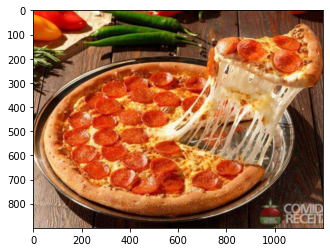

In [2]:
image = plt.imread('pizza')
plt.imshow(image)

### Tamanho da matriz

In [3]:
image.shape

(900, 1200, 3)

### Formato RGB

#### Deixando a imagem toda vermelha, zerando as camadas verde e azul

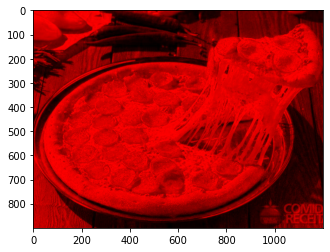

In [4]:
r = image.copy()
r[:,:,1] = 0
r[:,:,2] = 0
plt.imshow(r)

#### Deixando a imagem toda verde, zerando as camadas vermelho e azul

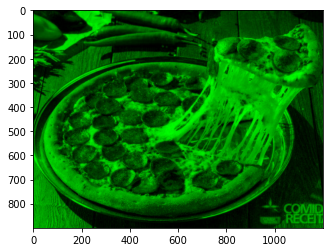

In [5]:
r = image.copy()
r[:,:,0] = 0
r[:,:,2] = 0
plt.imshow(r)

#### Deixando a imagem toda azul, zerando as camadas vermelho e verde

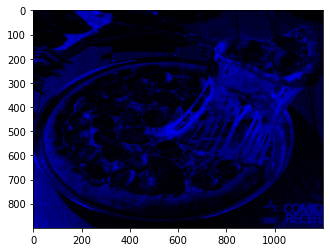

In [6]:
r = image.copy()
r[:,:,0] = 0
r[:,:,1] = 0
plt.imshow(r)

## Histograma

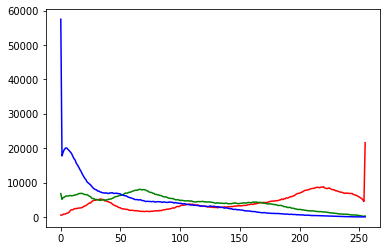

In [7]:
hr, bins = np.histogram(image[:,:,0], bins=256)
hg, bins = np.histogram(image[:,:,1], bins=256)
hb, bins = np.histogram(image[:,:,2], bins=256)

plt.plot(hr, color='r')
plt.plot(hg, color='g')
plt.plot(hb, color='b')

# Tarefa 1 - Comparação de imagens

### Código de comparação do histograma, fornecido pela Prof.Karin

In [8]:
def return_intersection(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection

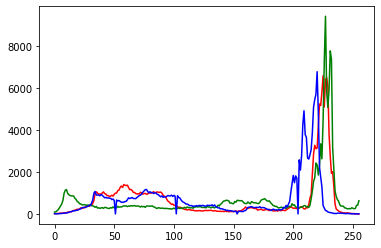

In [9]:
#Histograma do Hulk
image = plt.imread('./Base1/Hulk.png')
hr, bins = np.histogram(image[:,:,0], bins=256)
hg, bins = np.histogram(image[:,:,1], bins=256)
hb, bins = np.histogram(image[:,:,2], bins=256)

plt.plot(hr, color='r')
plt.plot(hg, color='g')
plt.plot(hb, color='b')

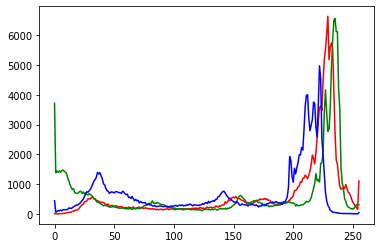

In [10]:
#Histograma da Mulher Maravilha
image = plt.imread('./Base1/Maravilha.png')
hr2, bins = np.histogram(image[:,:,0], bins=256)
hg2, bins = np.histogram(image[:,:,1], bins=256)
hb2, bins = np.histogram(image[:,:,2], bins=256)

plt.plot(hr2, color='r')
plt.plot(hg2, color='g')
plt.plot(hb2, color='b')

### Comparando - Exemplo

In [11]:
r = return_intersection(hr, hr2)
g = return_intersection(hg, hg2)
b = return_intersection(hb, hb2)

compatibilidade = r+g+b

#print(r, g, b)
#Resultado da soma dividido pelo maximo == porcentagem de acerto
print((compatibilidade / 3) * 100)

70.10873844506385


## Iniciando o treinamento do algoritmo

### Funções utilizadas para o cálculo de comparação e plotagem dos histogramas
#### Lembrando que também é utilizada a função fornecida pela Prof.Karin (declarada anteriormente).

In [12]:
def show_img(caminho_img):
    image = plt.imread(caminho_img)
    plt.imshow(image)
    
#Ler a imagem dado o caminho e retorn o histograma referente a cada cor
def get_histograma(caminho_imagem):
    image = plt.imread(caminho_imagem)
    hr, bins = np.histogram(image[:,:,0], bins=256)
    hg, bins = np.histogram(image[:,:,1], bins=256)
    hb, bins = np.histogram(image[:,:,2], bins=256)
    
    return hr, hg, hb

#Plota o grafico do histograma dado os valores do mesmo
def plot_histograma(hr, hg, hb):
    plt.plot(hr, color='r')
    plt.plot(hg, color='g')
    plt.plot(hb, color='b')
    

#Captura o histograma de cada imagem, comparar e retorna o grau de compatibilidade convertido em porcentagem
def calc_histograma(imagem1, imagem2):
    hr1, hg1, hb1 = get_histograma(imagem1)
    hr2, hg2, hb2 = get_histograma(imagem2)
    
    r = return_intersection(hr1, hr2)
    g = return_intersection(hg1, hg2)
    b = return_intersection(hb1, hb2)
    
    compatibilidade = r+g+b
    return compatibilidade


def show_grafico(dic_dados, chave_eh_valor = False, color="red"):
    eixo_x = ""
    eixo_y = ""
    
    if(chave_eh_valor):
        eixo_x = list(dic_dados.keys())
        eixo_y = list(dic_dados.values())
    else:
        eixo_x = list(dic_dados.values())
        eixo_y = list(dic_dados.keys())

    plt.barh(eixo_y, eixo_x, 0.5, color=color)
    
    #Mostrar valores ao lado das barras
    for i, v in enumerate(eixo_x):
        plt.text(v, i , str(v), color='blue')
        
    plt.show()

    
#Recebe uma lista de modelos e uma lista de testes
#Mostra na tela o nome da imagem a ser testada e os valores de acerto de cada modelo
def executa_testes(list_modelos, list_testes):
    for img_teste in list_testes:
        resultado = {}
        for img_base in list_modelos:
            quem_eh = calc_histograma(img_teste, img_base)
            resultado[img_base] = round(quem_eh, 2)

        print(img_teste)
        #show_img_gray(img_teste)
        #print(resultado)
        show_grafico(resultado)
    
#Retorna uma lista concatenando o nome do diretorio + nome da imagem
def concat_dir(diretorio, lista_imgs):
    return [diretorio + image for image in lista_imgs]
    

### Diretorio e caminho das imagens

In [13]:
diretorio_base1 = './Base1/'
diretorio_base2 = './Base2/'
modelos_img = ['America.png', 'Batman.png', 'Ferro.png', 'Flash.png', 
           'Hulk.png', 'Maravilha.png', 'super.png', 'wolverine.png']
modelos_img = concat_dir(diretorio_base1, modelos_img)

teste1_img = ['QUEM1.png', 'QUEM2.png', 'QUEM3.png', 'QUEM4.png', 'QUEM5.png']
teste1_img = concat_dir(diretorio_base1, teste1_img)

teste2_img = ['quem6.png', 'quem7.png', 'quem8.png', 'quem9.png', 'quem10.png', 
              'quem11.png', 'quem12.png', 'quem13.png', 'quem14.png', 'quem15.png', 'quem16.png']
teste2_img = concat_dir(diretorio_base2, teste2_img)


## 1ª e 2ª parte da Tarefa
### Utilizando a 1ª base de testes

./Base1/QUEM1.png


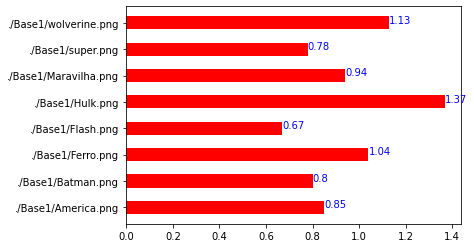

./Base1/QUEM2.png


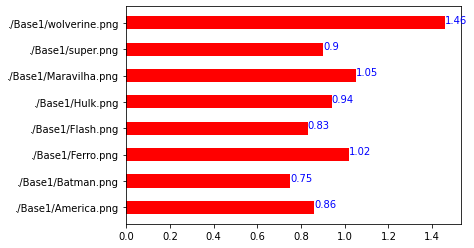

./Base1/QUEM3.png


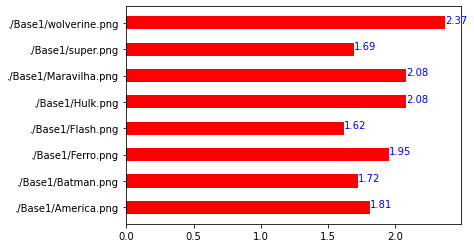

./Base1/QUEM4.png


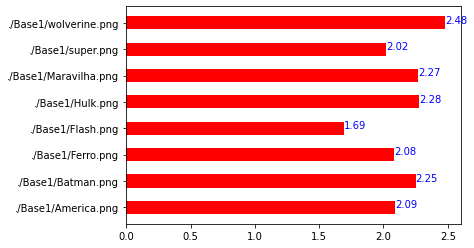

./Base1/QUEM5.png


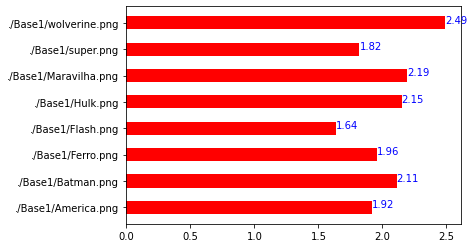

In [14]:
executa_testes(modelos_img, teste1_img)

## 3ª Parte da Tarefa
### Utilizando a 2ª base de testes

./Base2/quem6.png


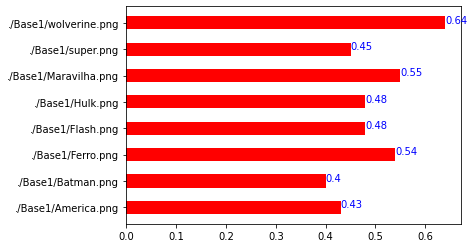

./Base2/quem7.png


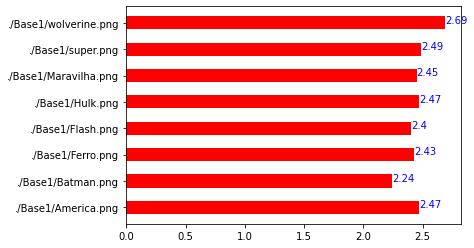

./Base2/quem8.png


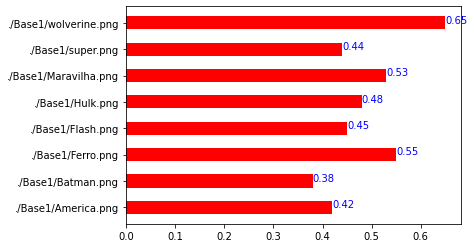

./Base2/quem9.png


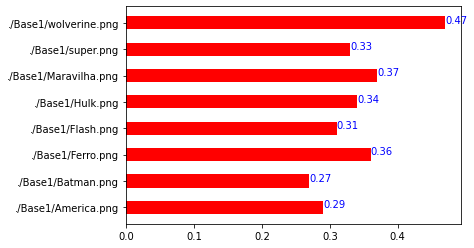

./Base2/quem10.png


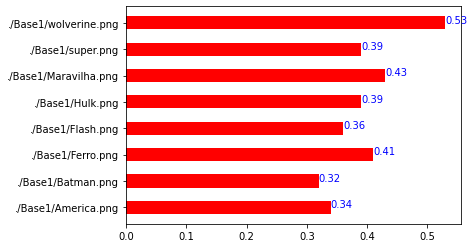

./Base2/quem11.png


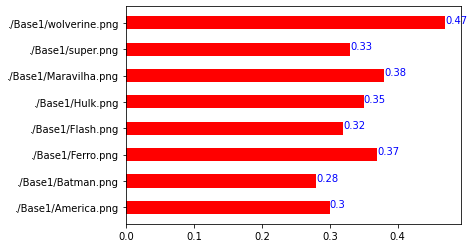

./Base2/quem12.png


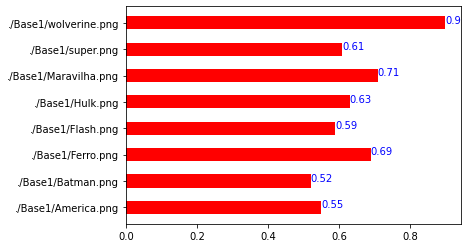

./Base2/quem13.png


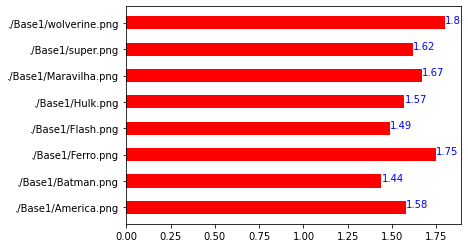

./Base2/quem14.png


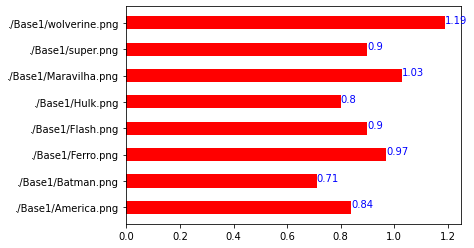

./Base2/quem15.png


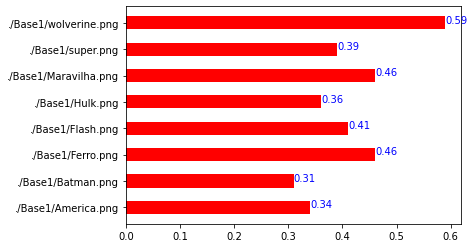

./Base2/quem16.png


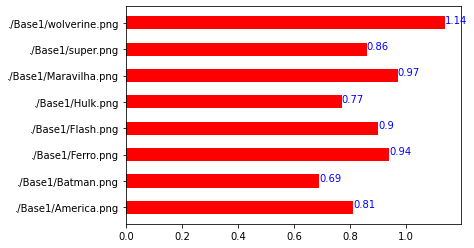

In [15]:
executa_testes(modelos_img, teste2_img)

## Utilizando outras formas de comparação

### Salvando os histogramas de cada imagem modelo num dicionario

In [16]:
#Importando as novas bibliotecas necessarias
from scipy.spatial import distance as dist
#pip3 install scikit-build (Necessario para a instalacao do opencv)
#sudo pip3 install --upgrade pip (Necessario upgrade do pip por conta do cmake)
#pip3 install opencv-python
import cv2

#index para os histogramas extraidos
dic_hist_modelos = {}

for img in modelos_img:
    image = cv2.imread(img)
    #Calculo do histograma
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    
    #Normalizando histograma
    hist = cv2.normalize(hist, hist).flatten()
    
    #Armazenando no dicionario
    dic_hist_modelos[img] = hist

#print(dic_images)

### Inicializando diretorio de toda base de teste "QUEM"

In [17]:
diretorio_all_quem = "./BaseQuem/"
teste_images = ['QUEM1.png', 'QUEM2.png', 'QUEM3.png', 'QUEM4.png', 'QUEM5.png',
                'quem6.png', 'quem7.png', 'quem8.png', 'quem9.png', 'quem10.png', 
                'quem11.png', 'quem12.png', 'quem13.png', 'quem14.png', 'quem15.png', 'quem16.png']

teste_images = concat_dir(diretorio_all_quem, teste_images)

### Salvando histogramas de todas base de teste "QUEM"

In [18]:
#index para os histogramas extraidos
dic_hist_quem = {}

for img in teste_images:
    image = cv2.imread(img)
    #Calculo do histograma
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    
    #Normalizando histograma
    hist = cv2.normalize(hist, hist).flatten()
    
    #Armazenando no dicionario
    dic_hist_quem[img] = hist

#print(dic_hist_quem)

### Usando Funções do OpenCV (cv2.compareHist)

#### Função para mostrar em ordem os resultados

In [20]:
def show_result_ordenado(dic_dados, crescente):
    eixo_y = list(dic_dados.values())
    eixo_x = list(dic_dados.keys())
    
    if crescente:
        eixo_x.sort()
    else:
        eixo_x.sort(reverse=True)
        
    for chave in eixo_x:
        print("Resultado: %f -> %s" %(chave, dic_dados[chave]))

#### Definição de um gabarito para avaliar a precisão dos métodos


In [21]:
diretorio_base_quem = './BaseQuem/'
diretorio_base_modelo = './Base1/'
gabarito_quem_aux = {
    "QUEM1.png": "Hulk.png", "QUEM2.png": "wolverine.png", "QUEM3.png": "Ferro.png", "QUEM4.png": "Batman.png", 
    "QUEM5.png": "Maravilha.png", "quem6.png": "Ferro.png", "quem7.png": "Maravilha.png", 
    "quem8.png": "Batman.png", "quem9.png": "Batman.png", "quem10.png": "America.png",
    "quem11.png": "Batman.png", "quem12.png": "Maravilha.png", "quem13.png": "Maravilha.png", 
    "quem14.png": "Flash.png", "quem15.png": "Flash.png", "quem16.png": "Flash.png"
}

gabarito_quem = {}

for chave in gabarito_quem_aux.keys():
    gabarito_quem[diretorio_base_quem + chave] = diretorio_base_modelo + gabarito_quem_aux[chave]


#### Função para verificar se determinado método acertou ou não

In [22]:
#Dependendo do tipo de metodo, o MENOR e MAIOR valor tem significados distintos
#Retorna se o o extremo benevolente do algoritmo diz respeito a imagem do gabarito
#Ou seja, se o maior (ou o menor) valor dele, eh de acordo com a imagem que deveria ser
def verifica_acerto(img_verificada, results, gabarito, menor_eh_acerto = False):
    acertou = False
    if(menor_eh_acerto):
        #Menor valor == maior precisao
        maior_prob = min(results.keys())

        #Verifico se a melhor resposta do metodo eh igual ao gabarito da img testada
        melhor_resposta_metodo = results[maior_prob]

        #Verificamos se eh igual ao gabarito
        if(melhor_resposta_metodo == gabarito[img_verificada]):
            #Se sim, informo que acertou
            acertou = True

        #show_result_ordenado(results, True) 

    else:
        #Maior valor == maior precisao
        maior_prob = max(results.keys())

        #Verifico se a melhor resposta do metodo eh igual ao gabarito da img testada
        melhor_resposta_metodo = results[maior_prob]

        #Verificamos se eh igual ao gabarito
        if(melhor_resposta_metodo == gabarito[img_verificada]):
            #Se sim, informo que acertou
            acertou = True

        #show_result_ordenado(results, False) 
    return acertou

#### Criando a função para a excução da 3ª e 4ª parte da tarefa

In [23]:
#Dicionario para os metodos de comparacao dos histogramas
opencv_methods = {
    ("Correlation", cv2.HISTCMP_CORREL),
    ("Intersection", cv2.HISTCMP_INTERSECT),
    ("Hellinger", cv2.HISTCMP_BHATTACHARYYA),
    ("Chi-Squared", cv2.HISTCMP_CHISQR)
}

def calc_opencv_methods(dic_hist_teste, dic_hist_modelos, gabarito):
    #Para avaliar a precisao dos metodos
    dic_acertos_metodos = {"Correlation": 0, "Intersection": 0, "Hellinger": 0, "Chi-Squared": 0}
    #Loop sobre o dic_hist_modelos(Onde possui os resultados dos histogramas)
    for (img_teste, hist_teste) in dic_hist_teste.items():
        print("----------  %s ----------" %img_teste)
        #show_img(img_teste)
        for(nome_metodo, funcao_metodo) in opencv_methods:
            #Reinicia o dicionario de resultados
            results = {}
            for(img_modelo, hist_modelo) in dic_hist_modelos.items():
                d = cv2.compareHist(hist_teste, hist_modelo, funcao_metodo)
                d = round(d, 2)
                
                #Chave se torna o resultado e o valor o modelo deste resultado
                results[d] = img_modelo

            #Mostrando os resultados e calculando acertos
            print(nome_metodo)
            
            #Reinicio a variavel de acerto
            acertou_imagem = False
            #Verifico se a melhor resposta do metodo eh igual ao gabarito da img testada
            if(nome_metodo == "Hellinger" or nome_metodo == "Chi-Squared"):
                print("----------MENOR VALOR == MAIOR PRECISAO----------")
                #Informo que o menor valor diz respeito a maior precisao
                acertou_imagem = verifica_acerto(img_teste, results, gabarito, True)
            else:
                acertou_imagem = verifica_acerto(img_teste, results, gabarito)
            
            #Se sim, acrescenta em um o acerto do respectivo metodo
            if(acertou_imagem):
                dic_acertos_metodos[nome_metodo] += 1
            
            #Informo que a chave do dic eh o valor do eixo X
            print(results)
            show_grafico(results, True)
            
    print("Acertos dos metodos")
    show_grafico(dic_acertos_metodos, color="blue")

#### Execução dos métodos do OpenCV

----------  ./BaseQuem/QUEM1.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


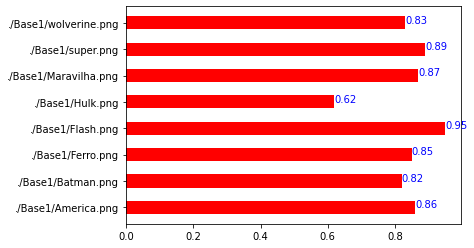

Intersection


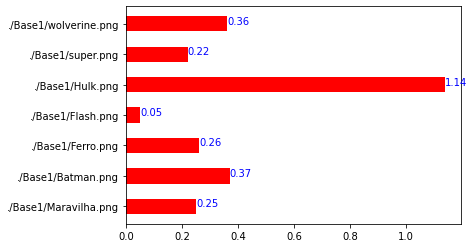

Correlation


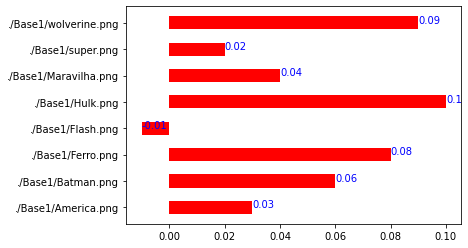

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


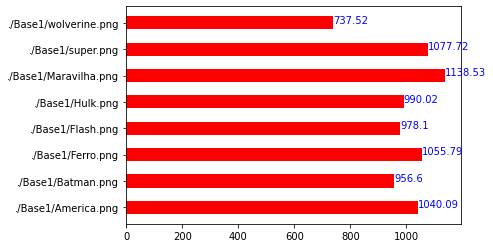

----------  ./BaseQuem/QUEM2.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


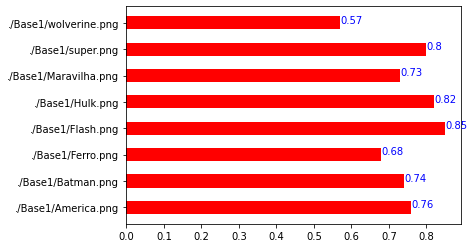

Intersection


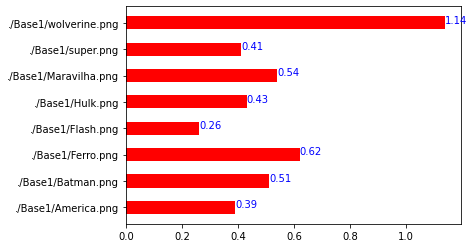

Correlation


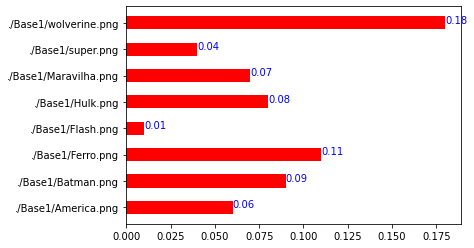

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


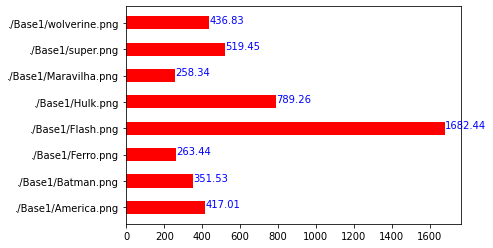

----------  ./BaseQuem/QUEM3.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


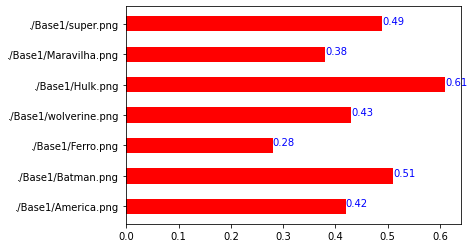

Intersection


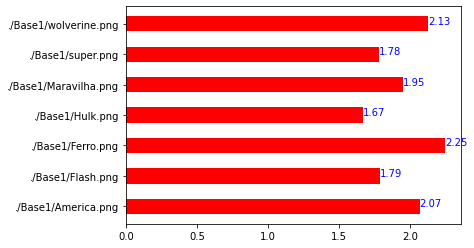

Correlation


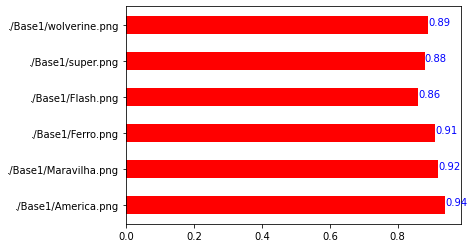

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


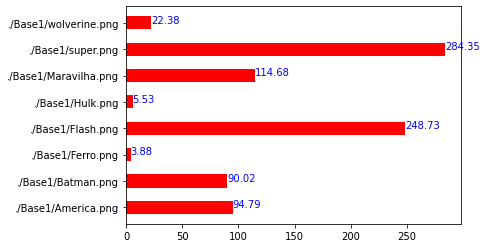

----------  ./BaseQuem/QUEM4.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


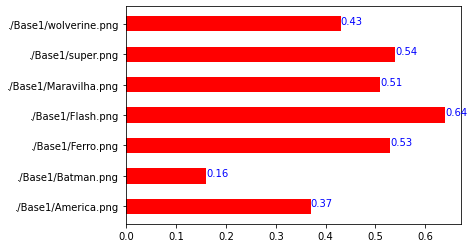

Intersection


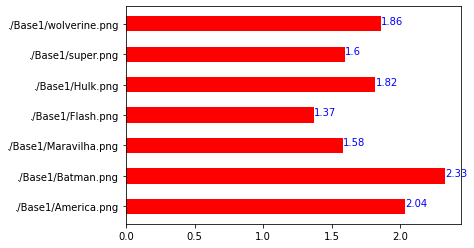

Correlation


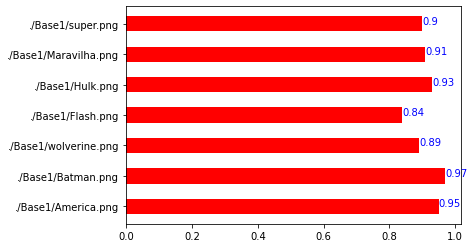

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


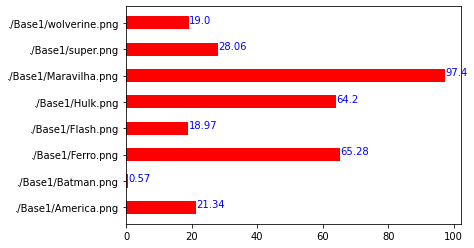

----------  ./BaseQuem/QUEM5.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


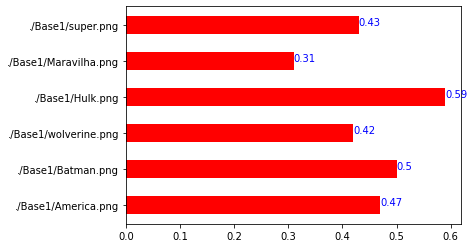

Intersection


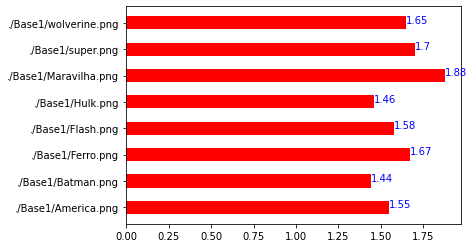

Correlation


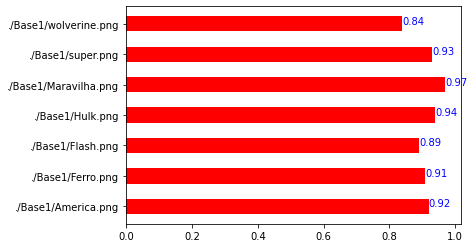

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


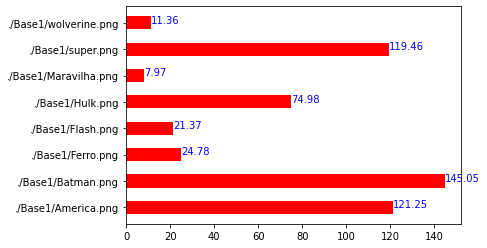

----------  ./BaseQuem/quem6.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


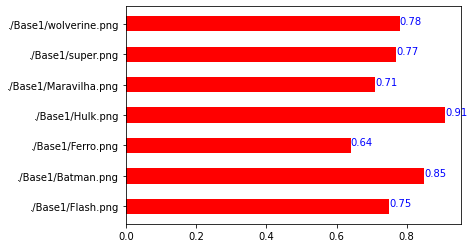

Intersection


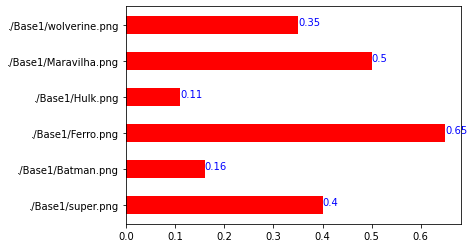

Correlation


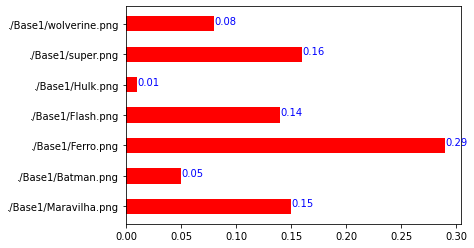

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


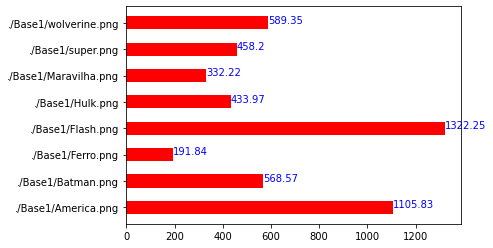

----------  ./BaseQuem/quem7.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


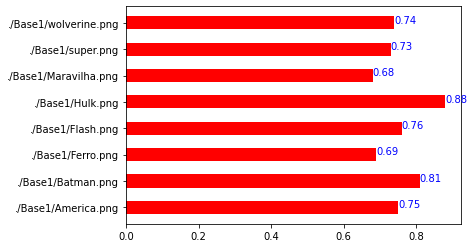

Intersection


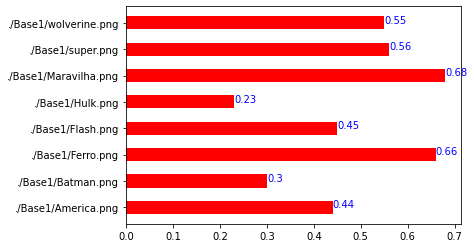

Correlation


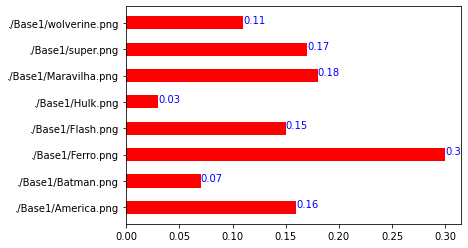

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


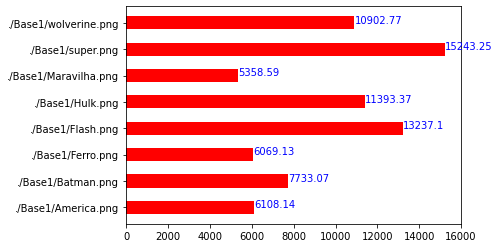

----------  ./BaseQuem/quem8.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


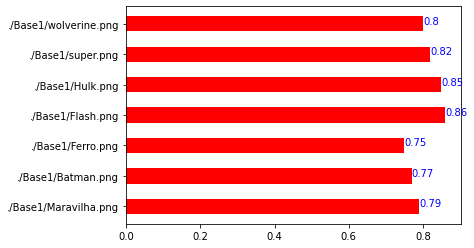

Intersection


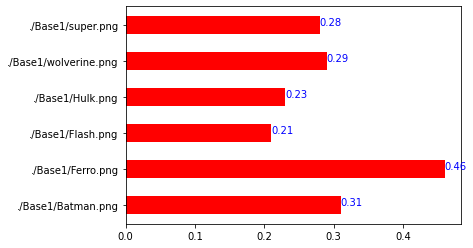

Correlation


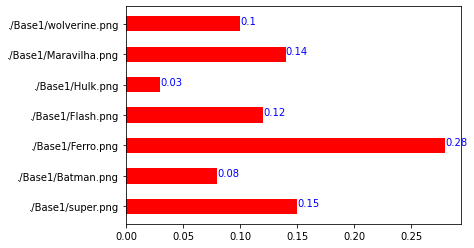

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


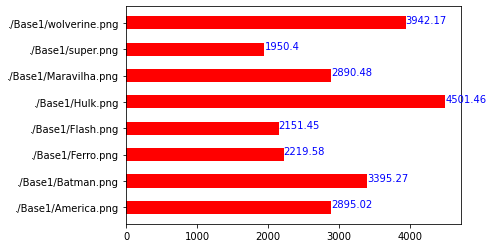

----------  ./BaseQuem/quem9.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


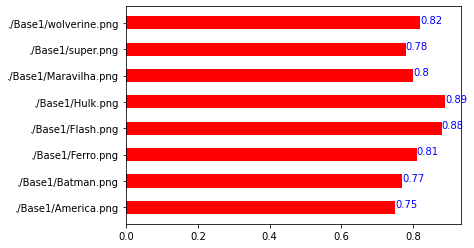

Intersection


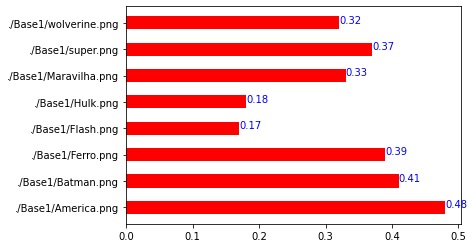

Correlation


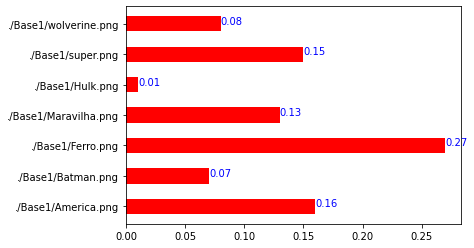

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


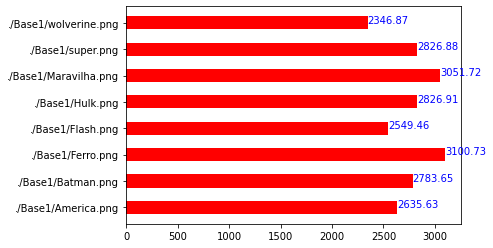

----------  ./BaseQuem/quem10.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


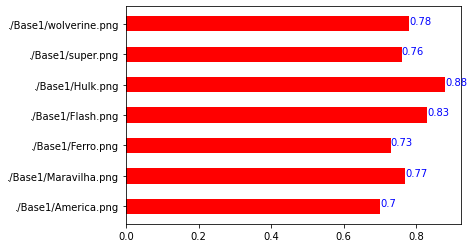

Intersection


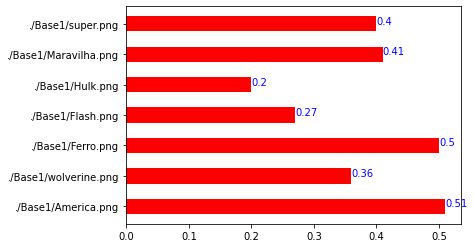

Correlation


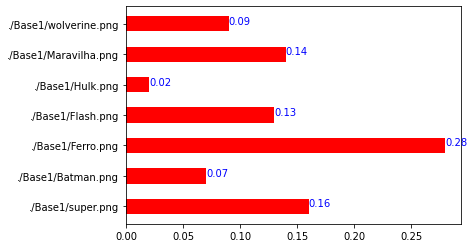

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


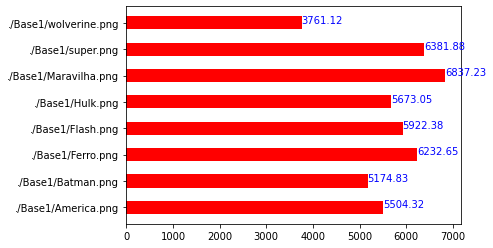

----------  ./BaseQuem/quem11.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


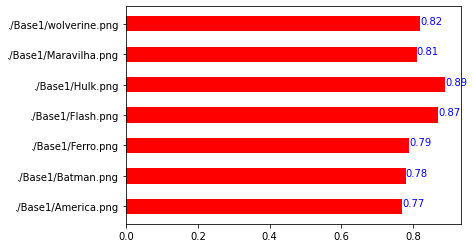

Intersection


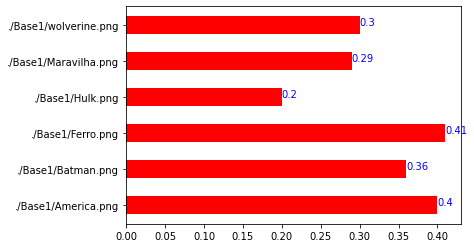

Correlation


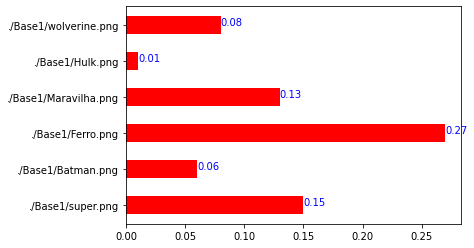

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


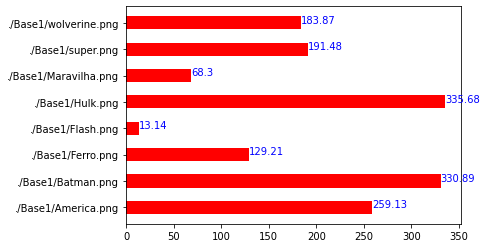

----------  ./BaseQuem/quem12.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


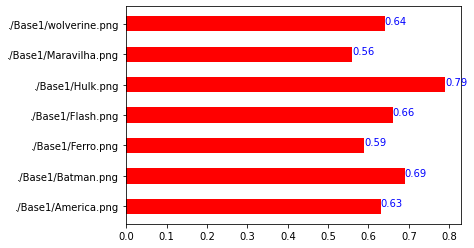

Intersection


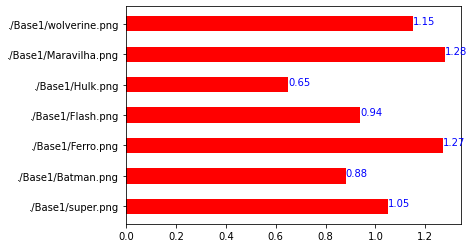

Correlation


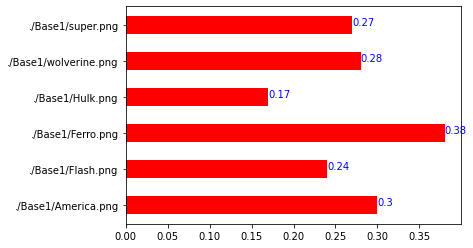

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


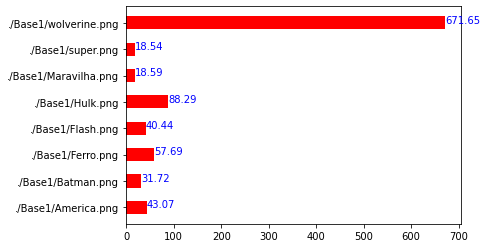

----------  ./BaseQuem/quem13.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


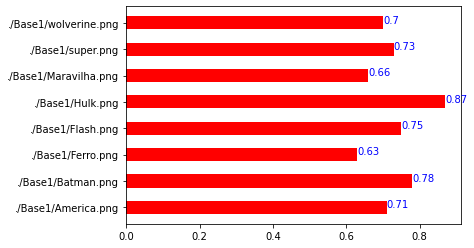

Intersection


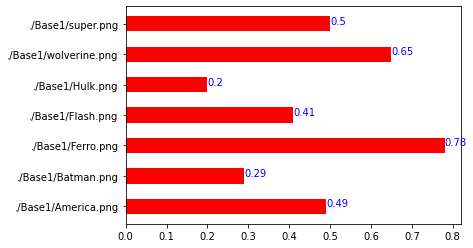

Correlation


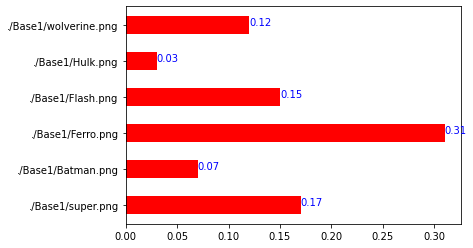

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


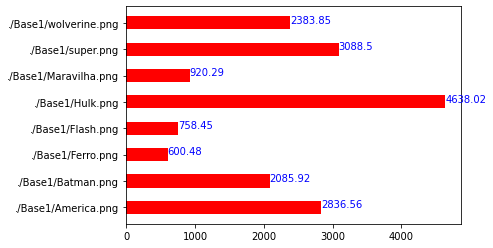

----------  ./BaseQuem/quem14.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


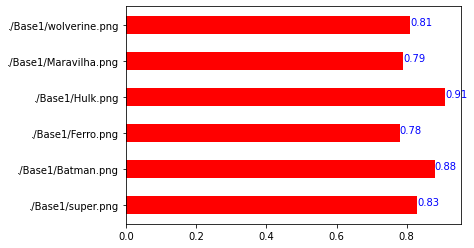

Intersection


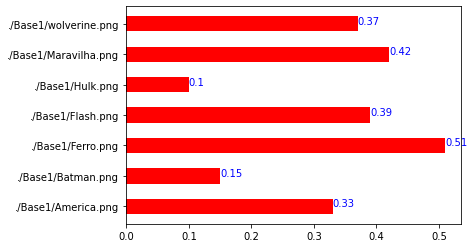

Correlation


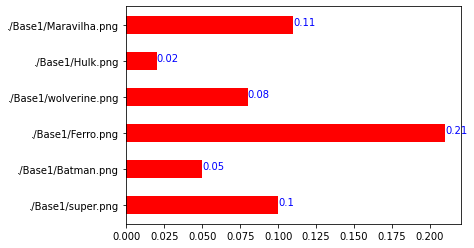

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


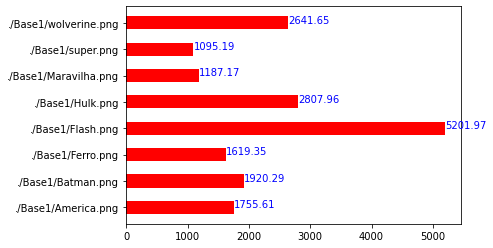

----------  ./BaseQuem/quem15.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


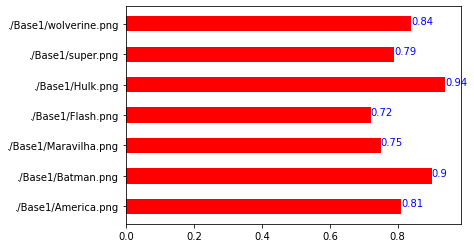

Intersection


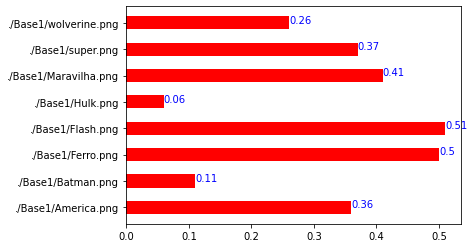

Correlation


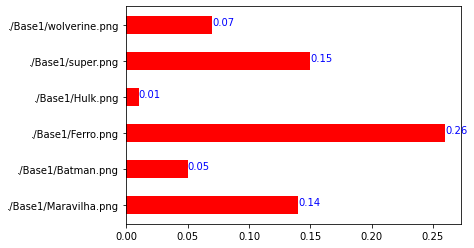

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


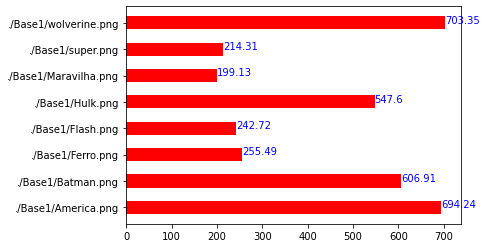

----------  ./BaseQuem/quem16.png ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


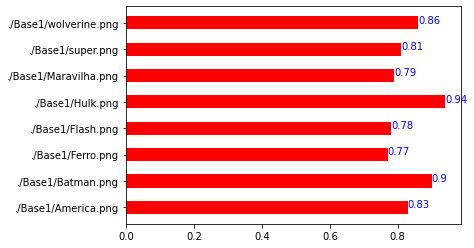

Intersection


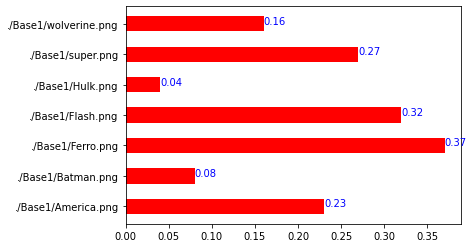

Correlation


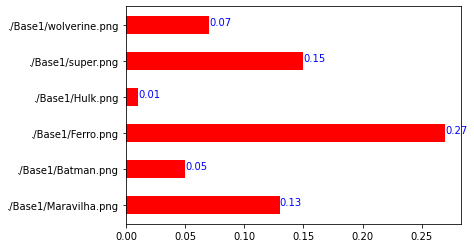

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


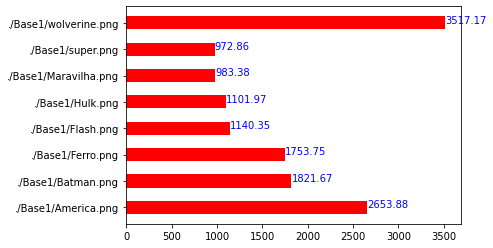

Acertos dos metodos


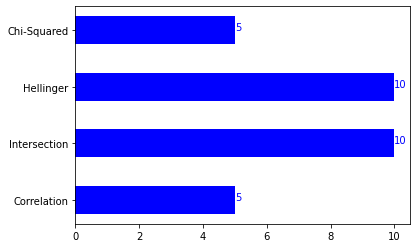

In [24]:
calc_opencv_methods(dic_hist_quem, dic_hist_modelos, gabarito_quem)

### Utilizando métricas de distância SciPy

#### Crianda a função para a excução da 3ª e 4ª parte da tarefa

In [25]:
#De forma analoga aos metodos do OpenCV, iniciamos um dicionario com o nome e o metodo scipy
scipy_methods = {
    ("Euclidean", dist.euclidean),
    ("Manhattan", dist.cityblock),
    ("Chebysev", dist.chebyshev)
}

#Calcula com base nos metodos de scip
def calc_scipy_metrics(dic_hist_teste, dic_hist_modelos, gabarito):
    dic_acertos_metodos = {
        "Euclidean": 0, "Manhattan": 0, "Chebysev": 0
    }
    
    print("|---------PARA OS METODOS SCIPY, O MENOR VALOR CORRESPONDE A MAIOR PRECISAO----------|\n")
    #Loop sobre o dic_hist_modelos(Onde possui os resultados dos histogramas)
    for (img_teste, hist_teste) in dic_hist_teste.items():
        print("----------  %s ----------" %img_teste)
        #show_img(img_teste)
        #Loop sobre os metodos do scipy
        for(nome_metodo, funcao_metodo) in scipy_methods:
            #Reinicia o dicionario de resultados
            results = {}
            for(img_modelo, hist_modelo) in dic_hist_modelos.items():

                d = funcao_metodo(hist_teste, hist_modelo)
                d = round(d, 2)
                #Chave se torna o resultado e o valor o modelo deste resultado
                results[d] = img_modelo

            #Mostrando os resultados e calculando acertos
            print(nome_metodo)
            show_grafico(results, True)
            
            #Calcula os acertos do metodo
            acertou_imagem = False
            acertou_imagem = verifica_acerto(img_teste, results, gabarito, True)
            if(acertou_imagem):
                dic_acertos_metodos[nome_metodo] += 1

    #print(dic_acertos_metodos)
    print("Quantidade de acerto dos metodos")
    show_grafico(dic_acertos_metodos, color="purple")


|---------PARA OS METODOS SCIPY, O MENOR VALOR CORRESPONDE A MAIOR PRECISAO----------|

----------  ./BaseQuem/QUEM1.png ----------
Chebysev


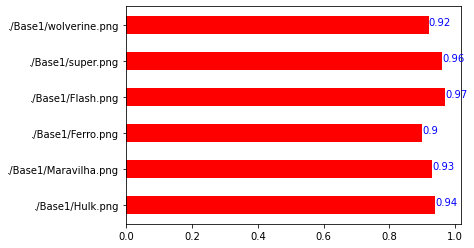

Euclidean


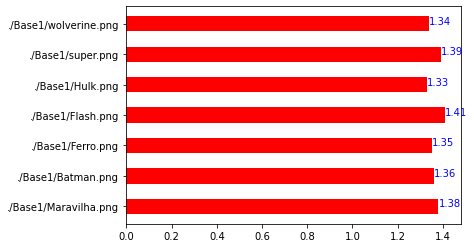

Manhattan


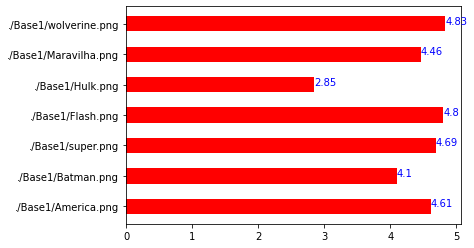

----------  ./BaseQuem/QUEM2.png ----------
Chebysev


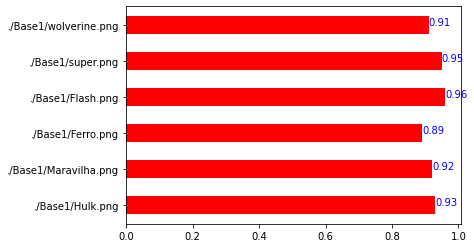

Euclidean


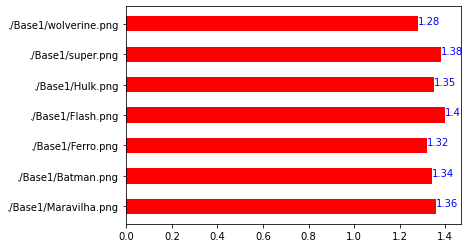

Manhattan


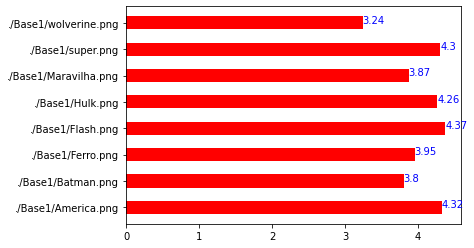

----------  ./BaseQuem/QUEM3.png ----------
Chebysev


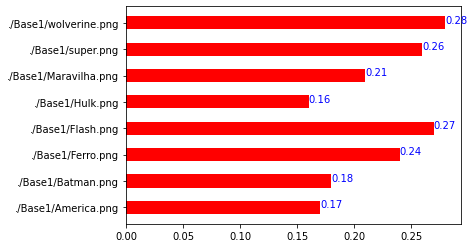

Euclidean


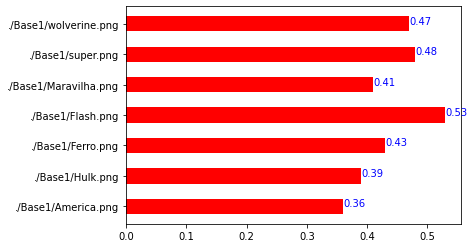

Manhattan


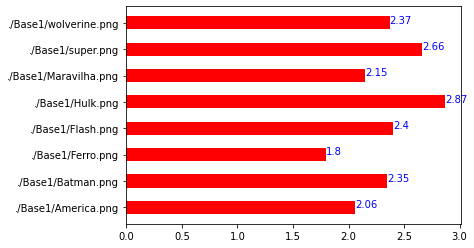

----------  ./BaseQuem/QUEM4.png ----------
Chebysev


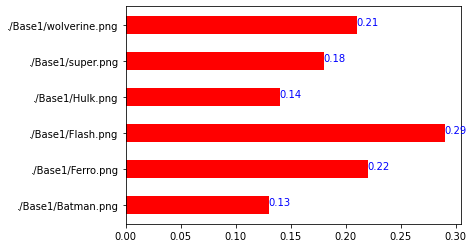

Euclidean


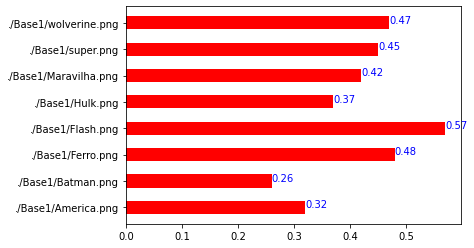

Manhattan


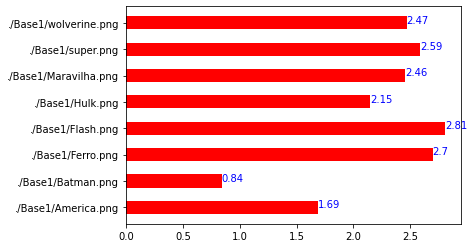

----------  ./BaseQuem/QUEM5.png ----------
Chebysev


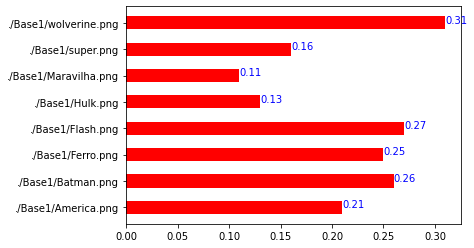

Euclidean


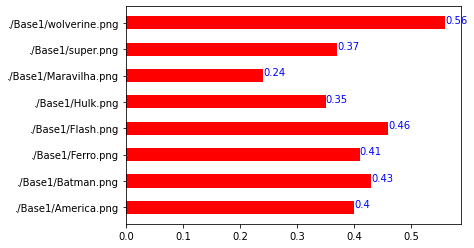

Manhattan


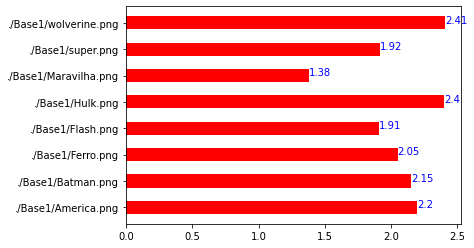

----------  ./BaseQuem/quem6.png ----------
Chebysev


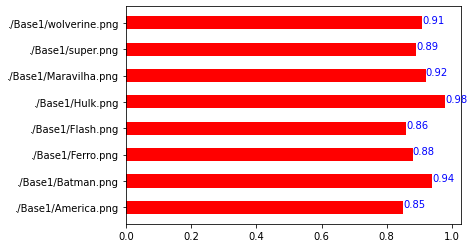

Euclidean


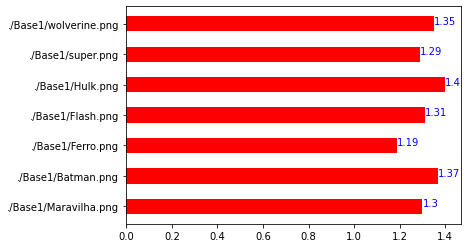

Manhattan


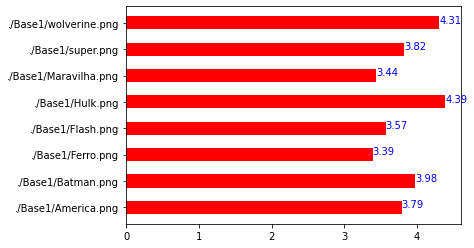

----------  ./BaseQuem/quem7.png ----------
Chebysev


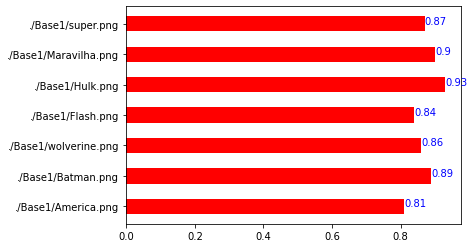

Euclidean


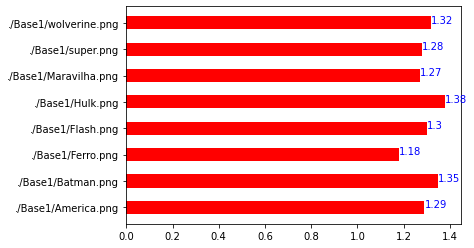

Manhattan


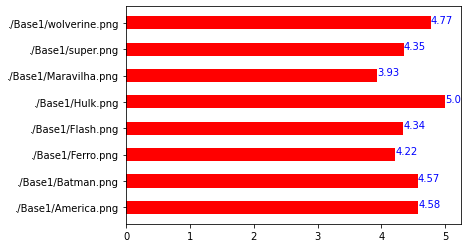

----------  ./BaseQuem/quem8.png ----------
Chebysev


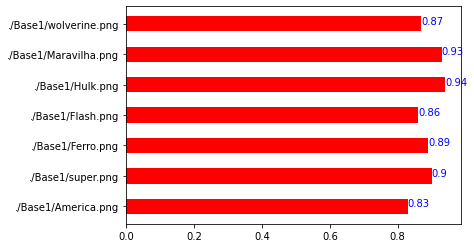

Euclidean


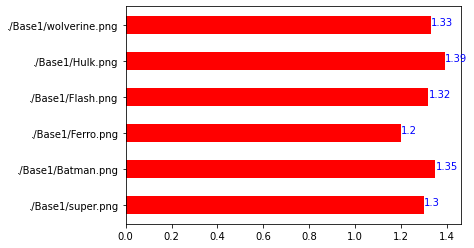

Manhattan


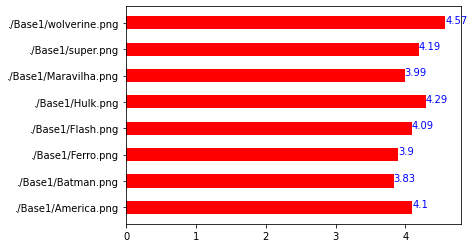

----------  ./BaseQuem/quem9.png ----------
Chebysev


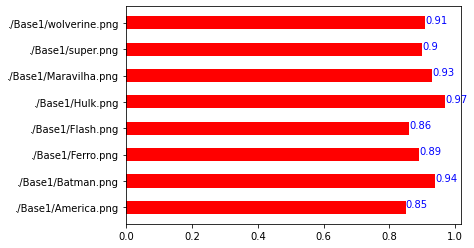

Euclidean


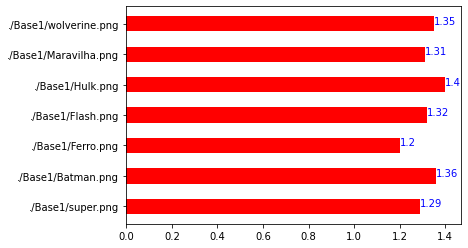

Manhattan


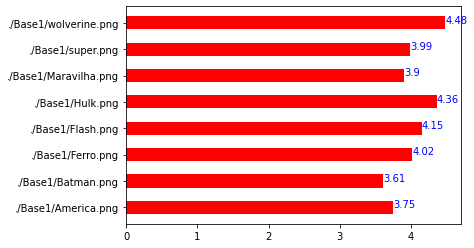

----------  ./BaseQuem/quem10.png ----------
Chebysev


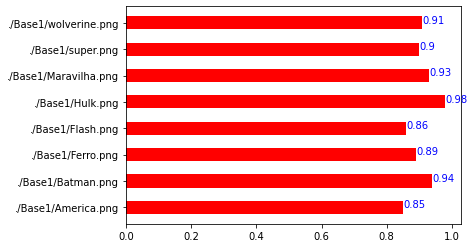

Euclidean


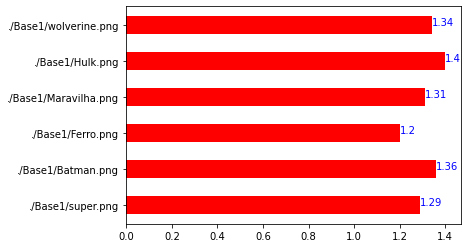

Manhattan


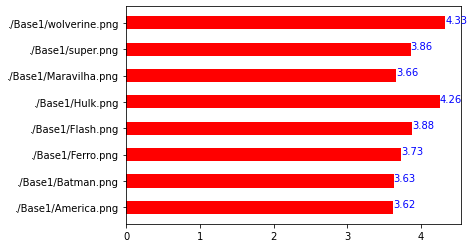

----------  ./BaseQuem/quem11.png ----------
Chebysev


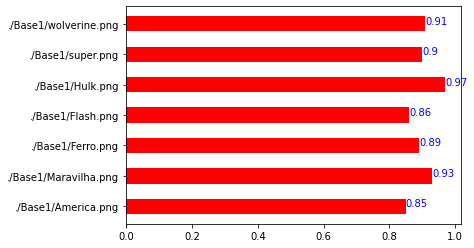

Euclidean


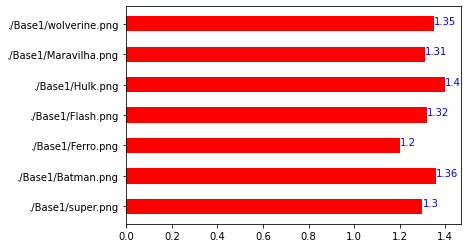

Manhattan


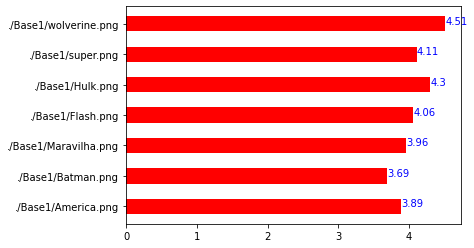

----------  ./BaseQuem/quem12.png ----------
Chebysev


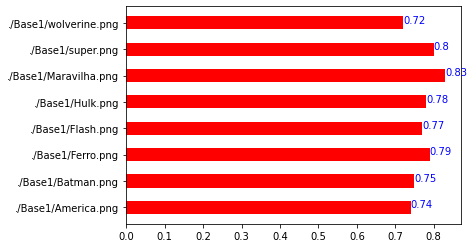

Euclidean


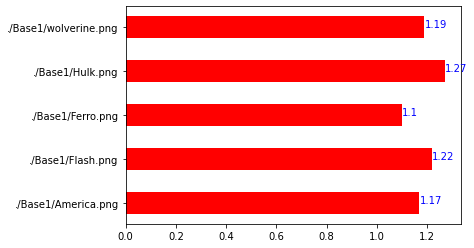

Manhattan


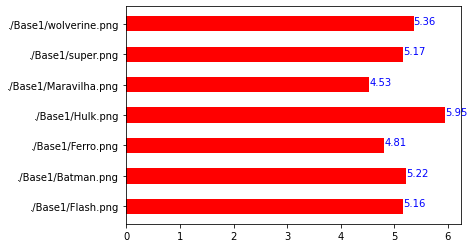

----------  ./BaseQuem/quem13.png ----------
Chebysev


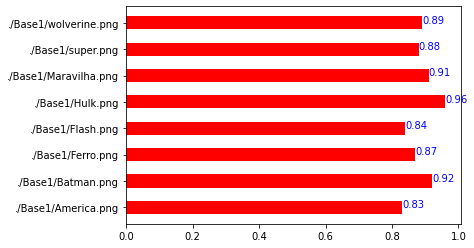

Euclidean


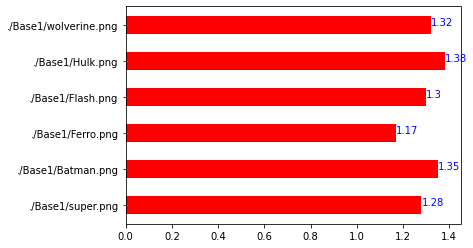

Manhattan


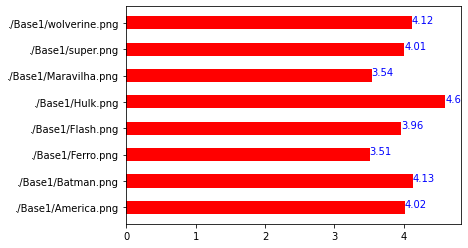

----------  ./BaseQuem/quem14.png ----------
Chebysev


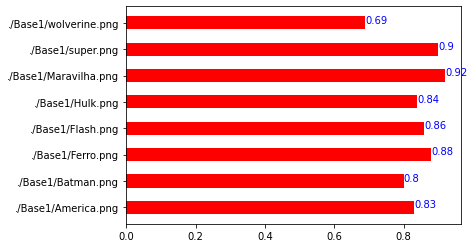

Euclidean


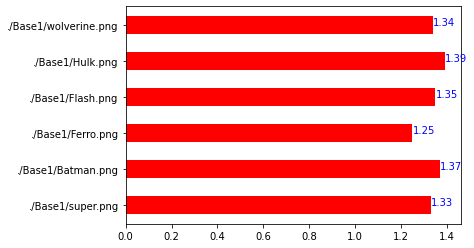

Manhattan


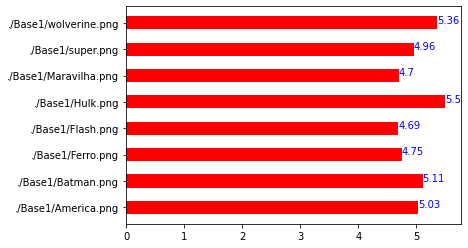

----------  ./BaseQuem/quem15.png ----------
Chebysev


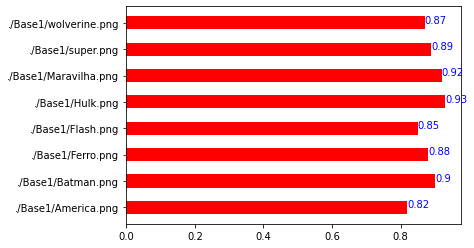

Euclidean


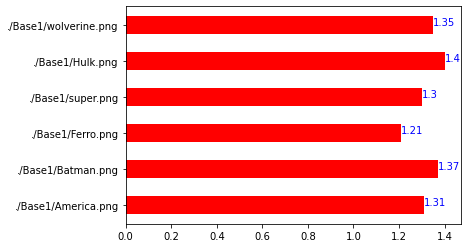

Manhattan


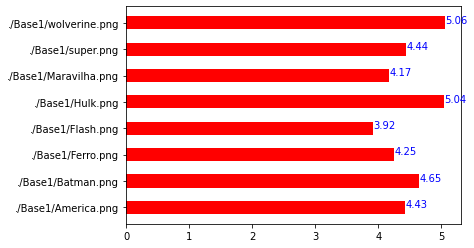

----------  ./BaseQuem/quem16.png ----------
Chebysev


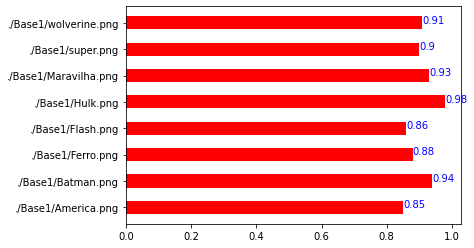

Euclidean


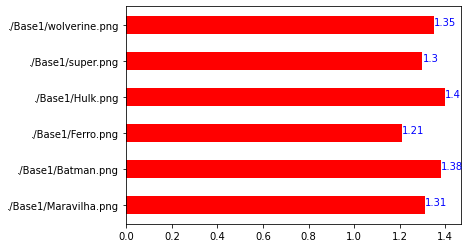

Manhattan


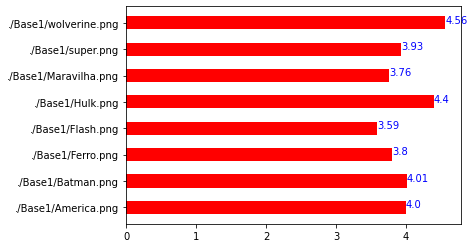

Quantidade de acerto dos metodos


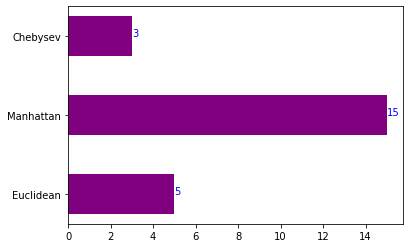

In [26]:
calc_scipy_metrics(dic_hist_quem, dic_hist_modelos, gabarito_quem)

### Com o resultado dos acertos dos métodos, podemos constatar que o melhor algoritmo para essa base de dados é a distância de Manhattan!

### 4ª Parte da Tarefa - Criando minha própria base de dados
#### Vamos utilizar fotos das latinhas de enérgeticos monster

In [47]:
diretorio_minha_base_modelo = "./MinhaBase_Modelo/"
diretorio_minha_base_teste = "./MinhaBase_Teste/"

modelo_images = ['m_branco.jpg', 'm_laranja.jpg', 'm_manga.jpg', 
                 'm_uva.jpg', 'm_dragon.jpg', 'm_original.jpg']

modelo_images = concat_dir(diretorio_minha_base_modelo, modelo_images)

teste_images = ['qualM1.jpg', 'qualM2.jpg', 'qualM3.jpg', 'qualM4.jpg', 'qualM5.jpg',
                'qualM6.jpg', 'qualM7.jpg', 'qualM8.jpg', 'qualM9.jpg', 'qualM10.jpg',
                'qualM11.jpg', 'qualM12.jpg']

teste_images = concat_dir(diretorio_minha_base_teste, teste_images)

#### Criando gabarito da mnha base de dados

In [50]:
gabarito_qualM_aux = {
    'qualM1.jpg': "m_dragon.jpg", 'qualM2.jpg': "m_dragon.jpg",
    'qualM3.jpg': "m_manga.jpg",'qualM4.jpg': "m_manga.jpg",
    'qualM5.jpg': "m_original.jpg",'qualM6.jpg': "m_original.jpg",
    'qualM7.jpg': "m_uva.jpg", 'qualM8.jpg': "m_uva.jpg", 'qualM9.jpg': "m_branco.jpg", 
    'qualM10.jpg': "m_uva.jpg",'qualM11.jpg': "m_laranja.jpg", 'qualM12.jpg': "m_laranja.jpg"
}

gabarito_qualM = {}
for chave in gabarito_qualM_aux.keys():
    gabarito_qualM[diretorio_minha_base_teste + chave] = diretorio_minha_base_modelo + gabarito_qualM_aux[chave]
    
#print(gabarito_qualM)

### Executando algoritmo com minha base de dados

#### Função para calcular os histogramas

In [48]:
def get_histogramas(list_imagens):
    print("Lendo imagens para calculo dos histogramas...")
    dic_hist = {}
    for img in list_imagens:
        #print(img)
        image = cv2.imread(img)
        #Calculo do histograma
        #8 box por channel, 512 dim feature vector, 
        hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        
        #Normalizando o histograma
        hist = cv2.normalize(hist, hist).flatten()
        
        #Armazenando no dicionario
        dic_hist[img] = hist
    print("...Finalizado calculo dos histogramas...")
    return dic_hist

#### Obtendo os histogramas dos modelos e testes

In [49]:
dic_hist_modelo = get_histogramas(modelo_images)
print("\n")
dic_hist_qualM = get_histogramas(teste_images)

Lendo imagens para calculo dos histogramas...
...Finalizado calculo dos histogramas...


Lendo imagens para calculo dos histogramas...
...Finalizado calculo dos histogramas...


#### Execução utilizando os métodos do openCV

----------  ./MinhaBase_Teste/qualM1.jpg ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


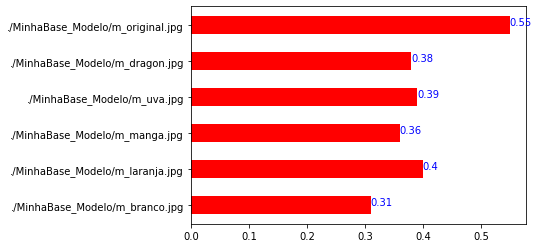

Intersection


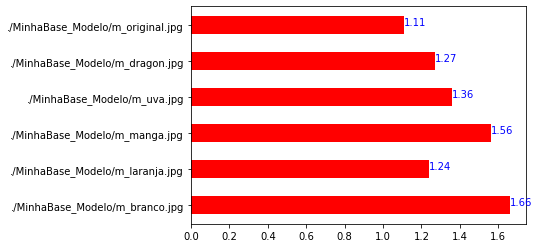

Correlation


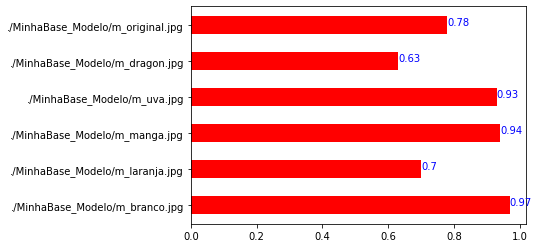

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


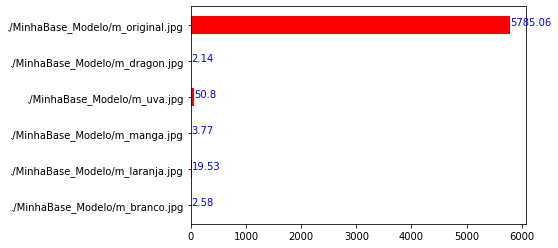

----------  ./MinhaBase_Teste/qualM2.jpg ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


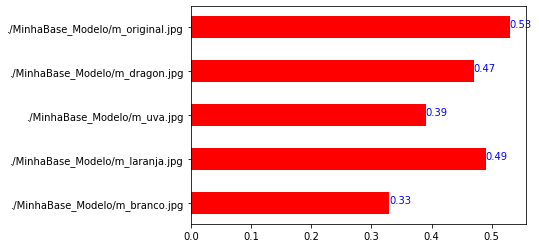

Intersection


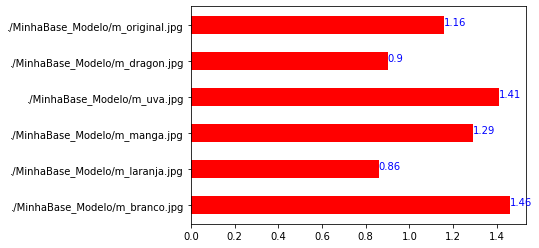

Correlation


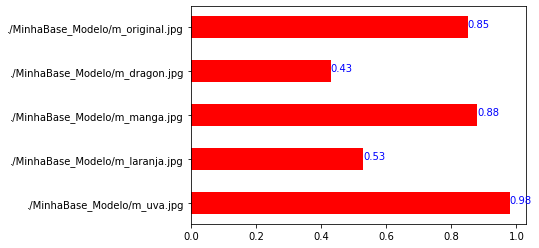

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


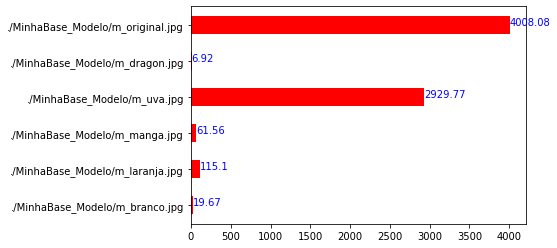

----------  ./MinhaBase_Teste/qualM3.jpg ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


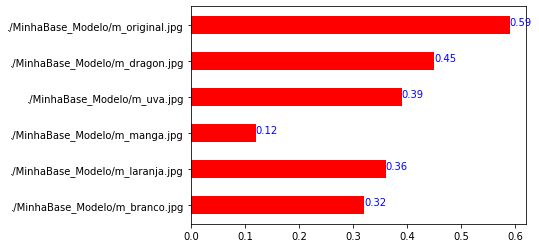

Intersection


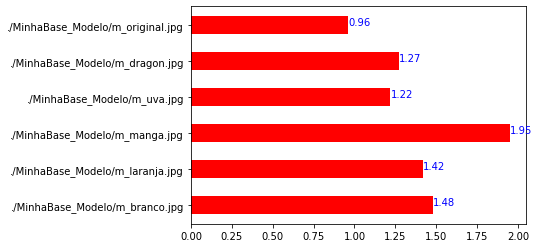

Correlation


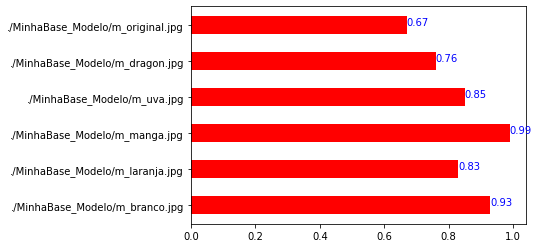

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


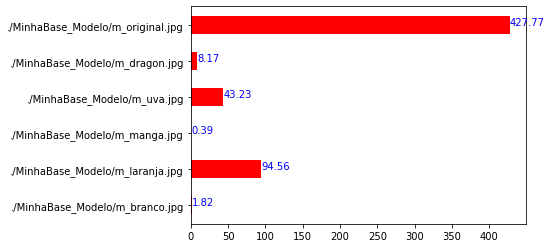

----------  ./MinhaBase_Teste/qualM4.jpg ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


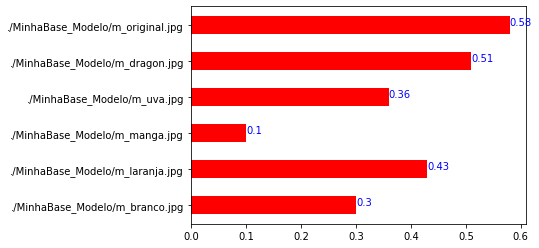

Intersection


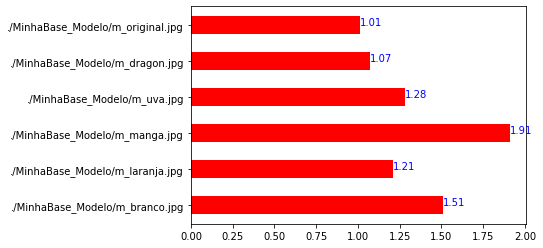

Correlation


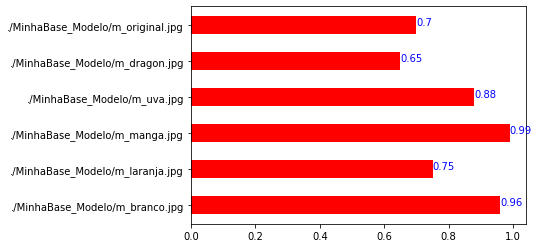

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


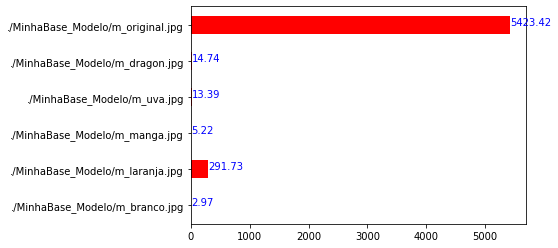

----------  ./MinhaBase_Teste/qualM5.jpg ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


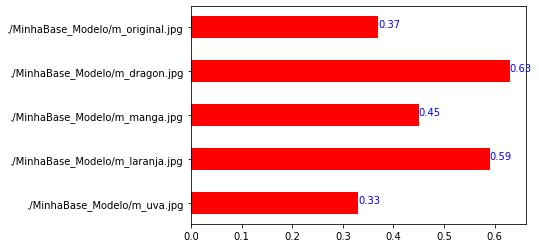

Intersection


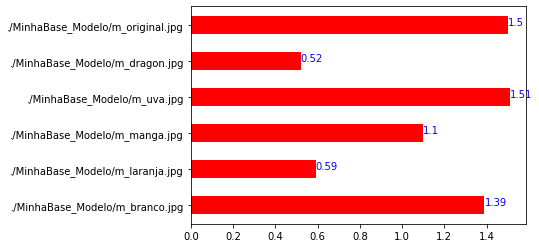

Correlation


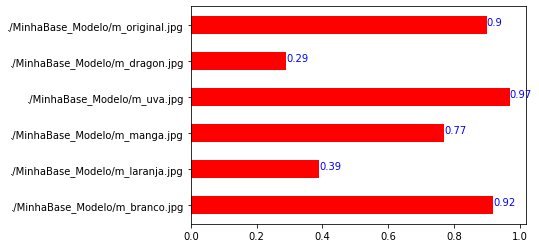

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


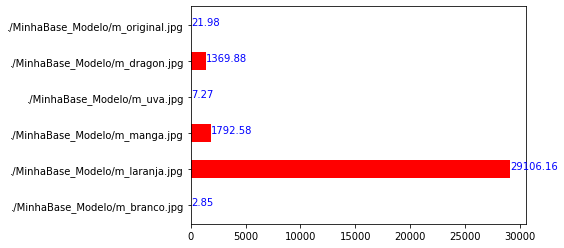

----------  ./MinhaBase_Teste/qualM6.jpg ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


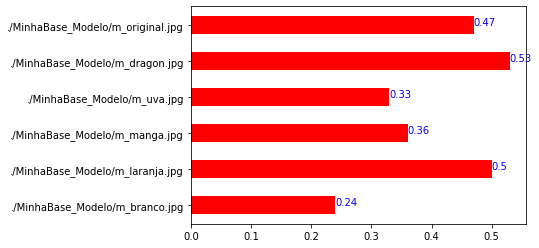

Intersection


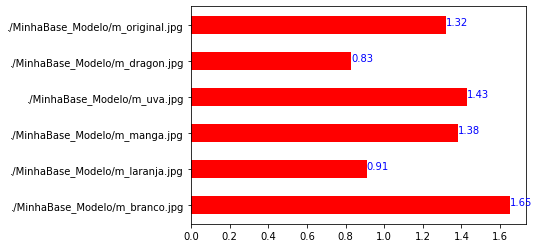

Correlation


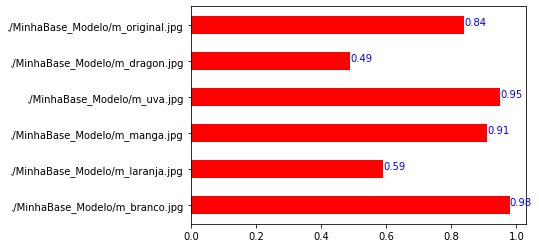

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


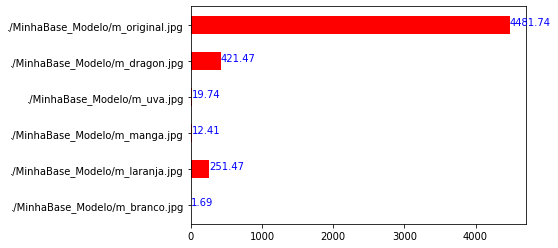

----------  ./MinhaBase_Teste/qualM7.jpg ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


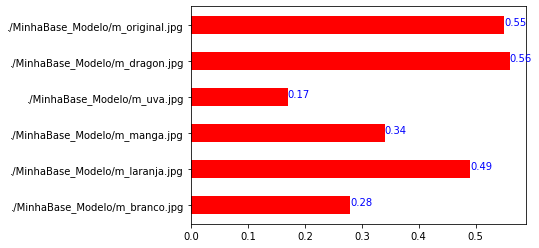

Intersection


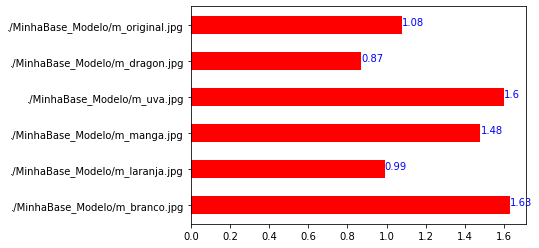

Correlation


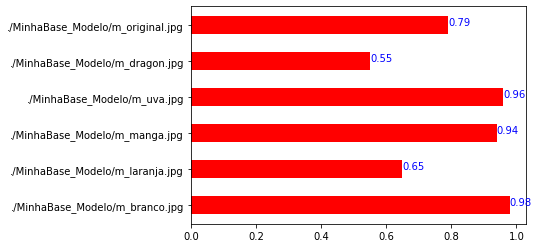

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


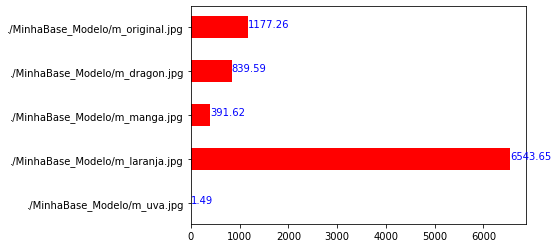

----------  ./MinhaBase_Teste/qualM8.jpg ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


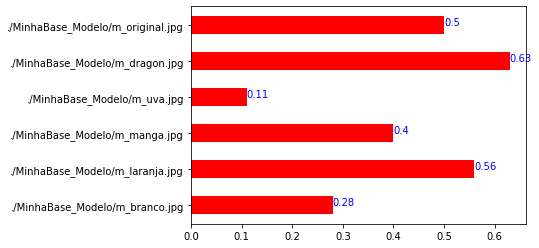

Intersection


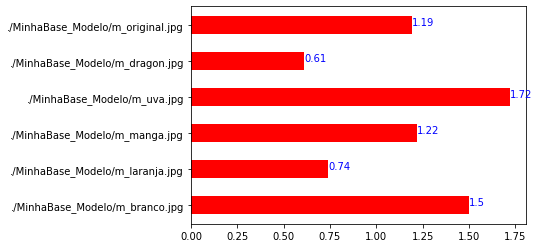

Correlation


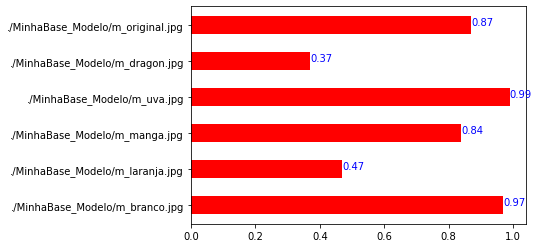

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


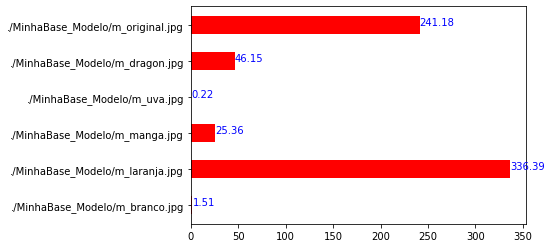

----------  ./MinhaBase_Teste/qualM9.jpg ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


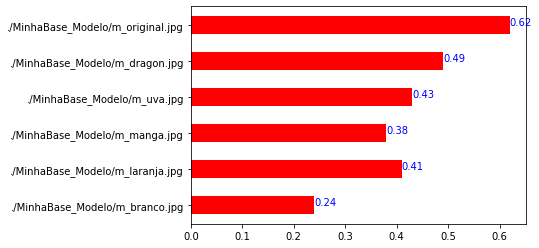

Intersection


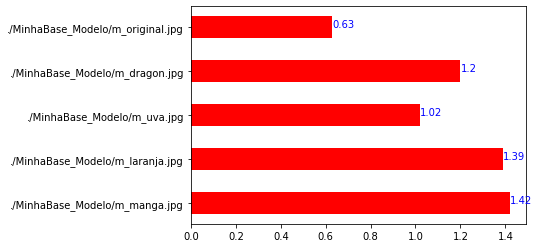

Correlation


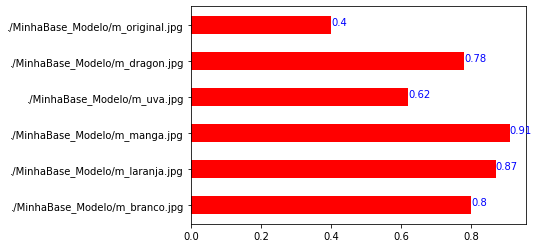

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


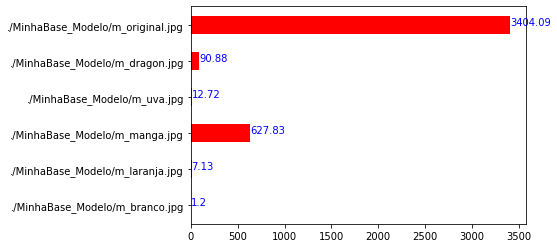

----------  ./MinhaBase_Teste/qualM10.jpg ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


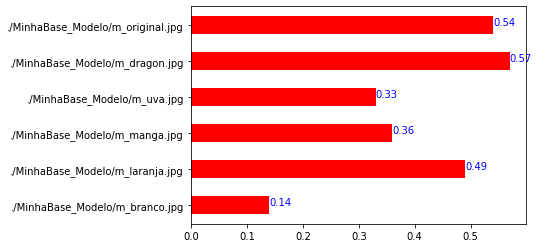

Intersection


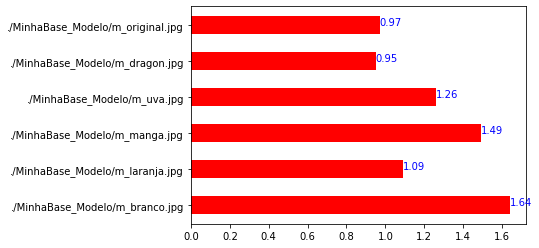

Correlation


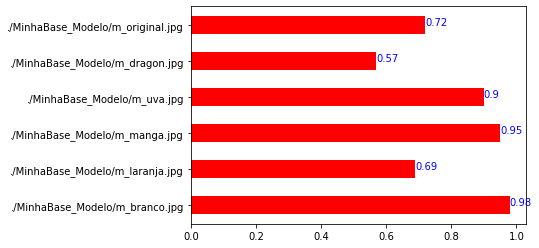

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


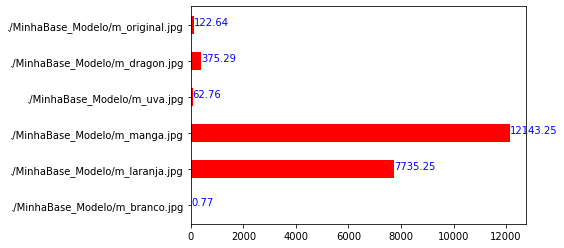

----------  ./MinhaBase_Teste/qualM11.jpg ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


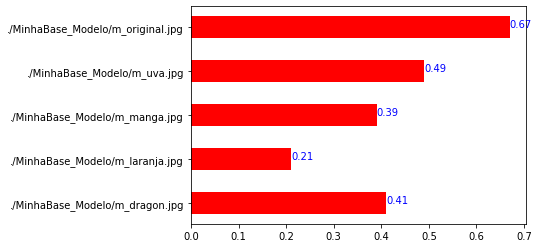

Intersection


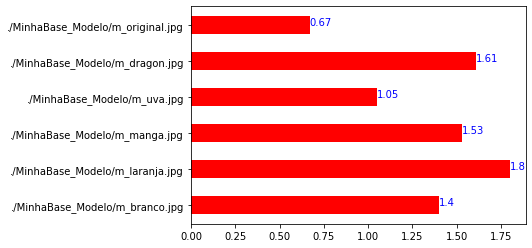

Correlation


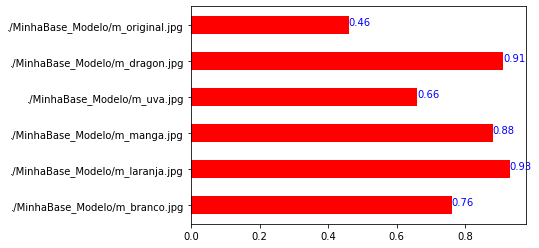

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


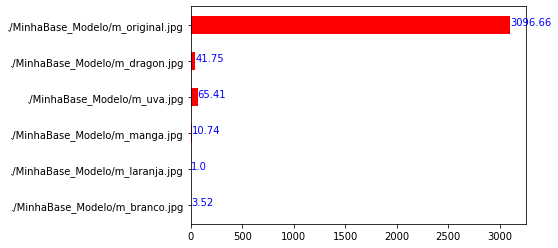

----------  ./MinhaBase_Teste/qualM12.jpg ----------
Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


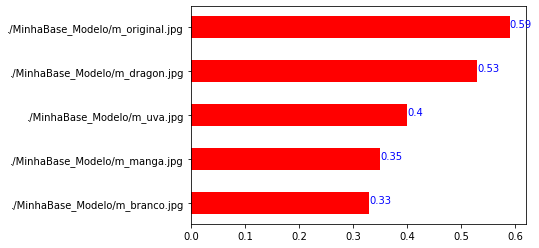

Intersection


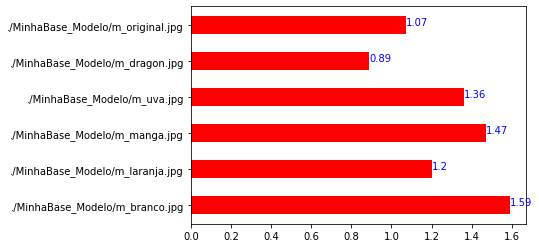

Correlation


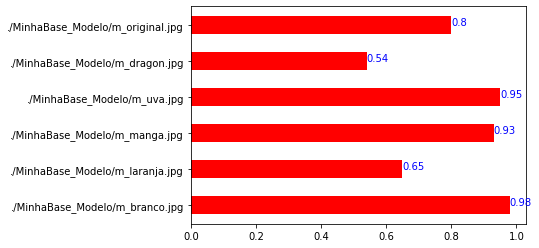

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


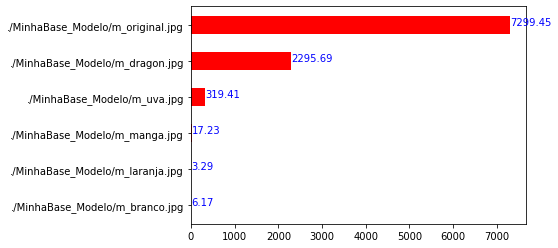

Acertos dos metodos


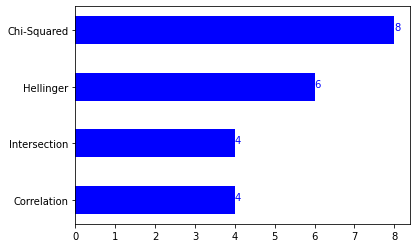

In [51]:
calc_opencv_methods(dic_hist_qualM, dic_hist_modelo, gabarito_qualM)

#### Execução utilizando os métodos do sciPY

|---------PARA OS METODOS SCIPY, O MENOR VALOR CORRESPONDE A MAIOR PRECISAO----------|

----------  ./MinhaBase_Teste/qualM1.jpg ----------
Chebysev


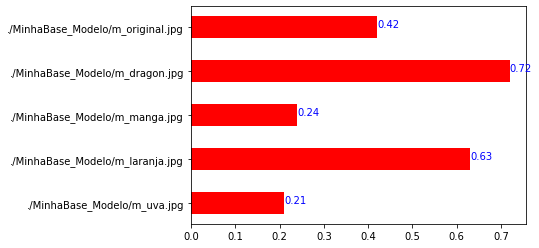

Euclidean


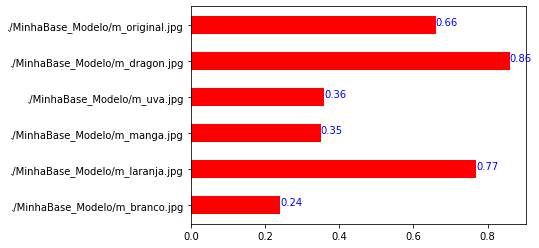

Manhattan


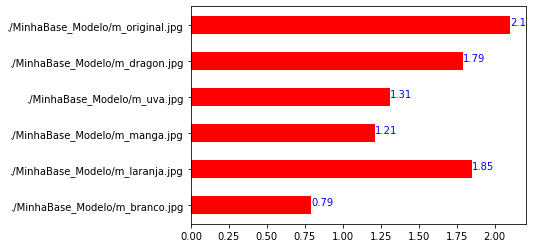

----------  ./MinhaBase_Teste/qualM2.jpg ----------
Chebysev


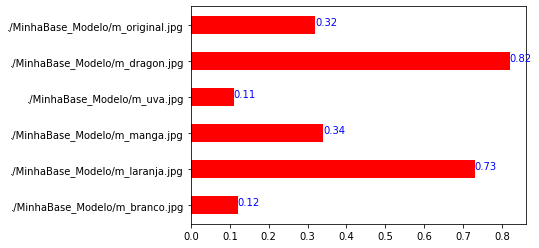

Euclidean


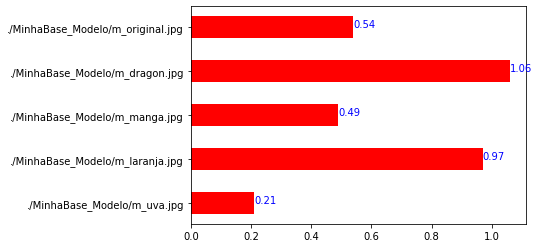

Manhattan


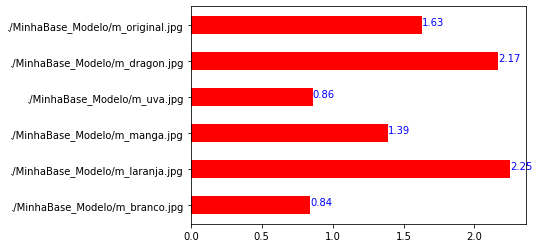

----------  ./MinhaBase_Teste/qualM3.jpg ----------
Chebysev


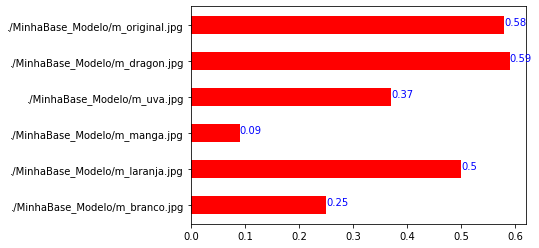

Euclidean


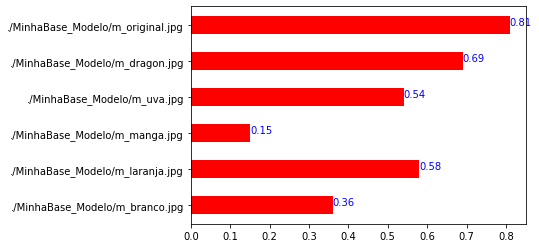

Manhattan


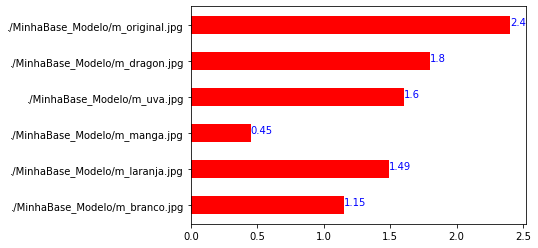

----------  ./MinhaBase_Teste/qualM4.jpg ----------
Chebysev


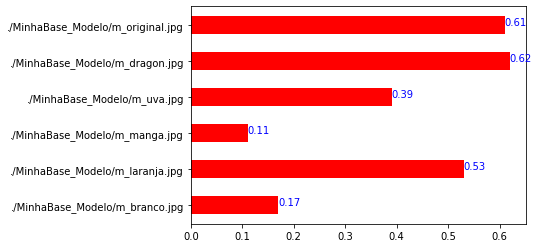

Euclidean


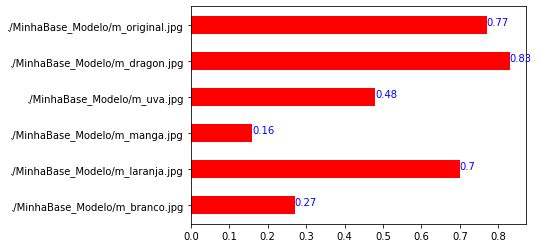

Manhattan


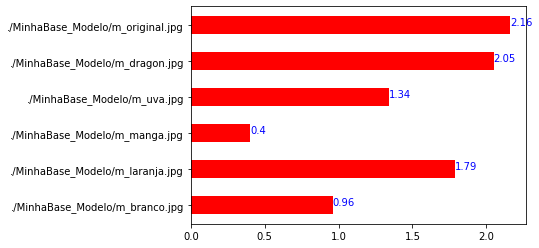

----------  ./MinhaBase_Teste/qualM5.jpg ----------
Chebysev


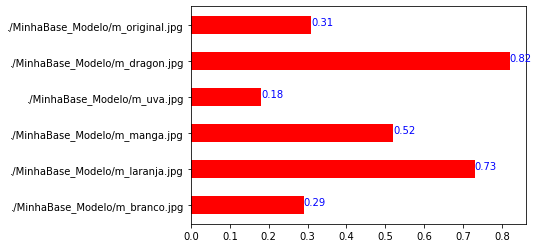

Euclidean


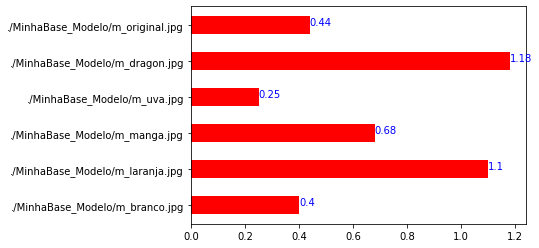

Manhattan


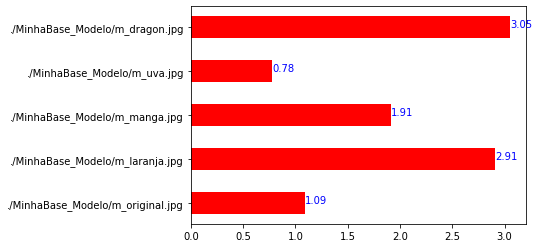

----------  ./MinhaBase_Teste/qualM6.jpg ----------
Chebysev


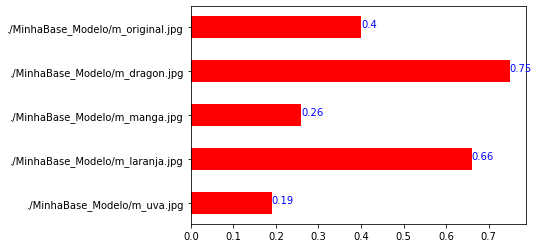

Euclidean


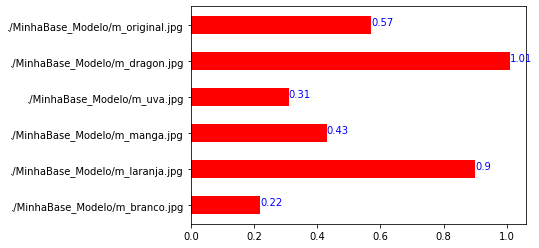

Manhattan


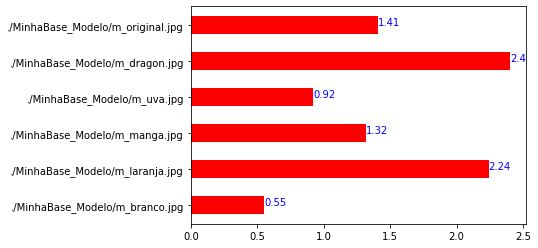

----------  ./MinhaBase_Teste/qualM7.jpg ----------
Chebysev


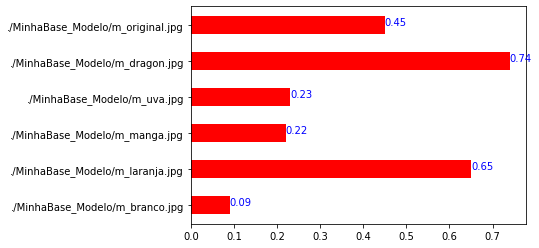

Euclidean


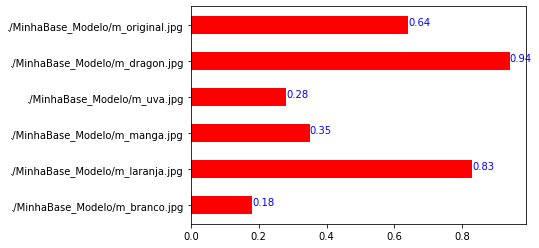

Manhattan


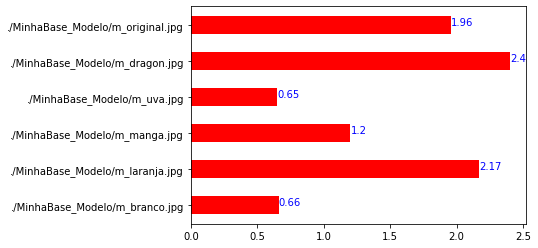

----------  ./MinhaBase_Teste/qualM8.jpg ----------
Chebysev


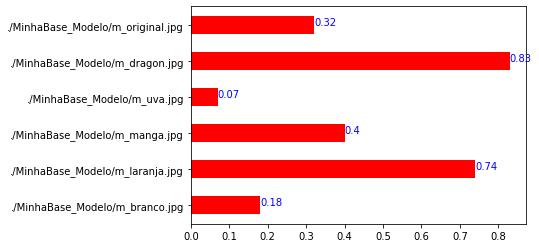

Euclidean


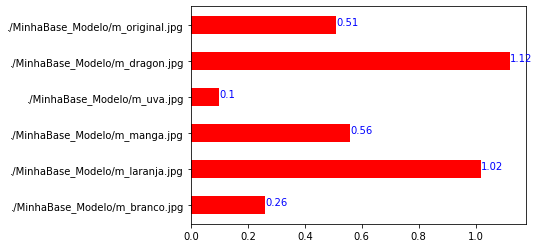

Manhattan


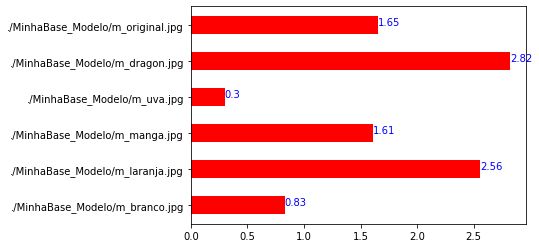

----------  ./MinhaBase_Teste/qualM9.jpg ----------
Chebysev


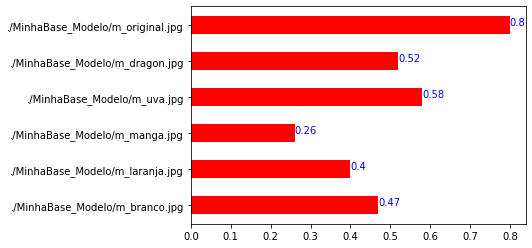

Euclidean


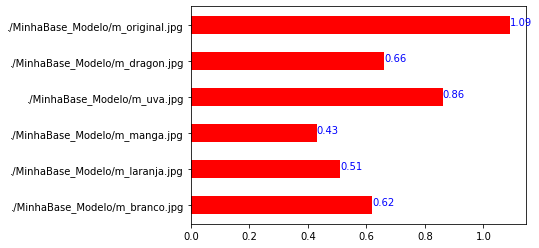

Manhattan


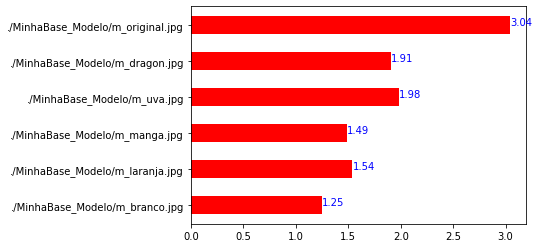

----------  ./MinhaBase_Teste/qualM10.jpg ----------
Chebysev


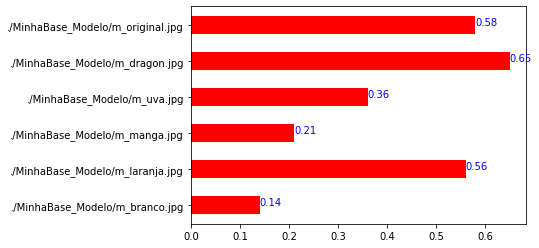

Euclidean


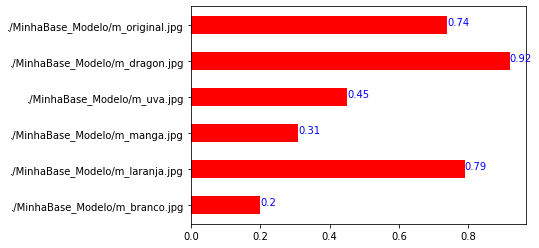

Manhattan


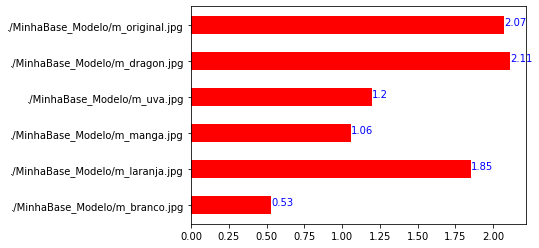

----------  ./MinhaBase_Teste/qualM11.jpg ----------
Chebysev


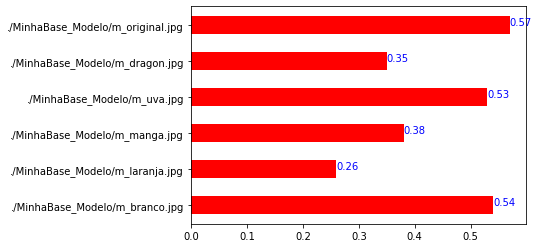

Euclidean


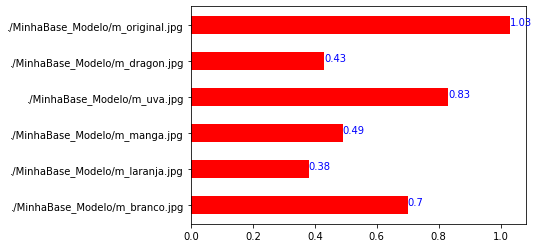

Manhattan


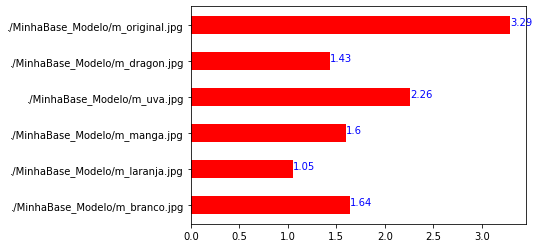

----------  ./MinhaBase_Teste/qualM12.jpg ----------
Chebysev


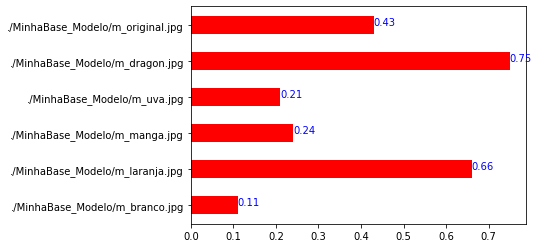

Euclidean


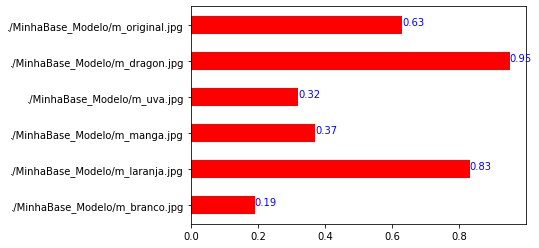

Manhattan


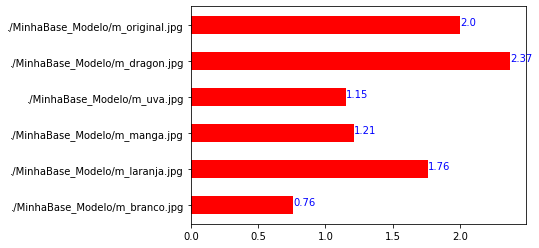

Quantidade de acerto dos metodos


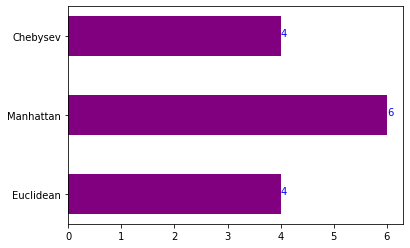

In [37]:
calc_scipy_metrics(dic_hist_qualM, dic_hist_modelo, gabarito_qualM)

#### Conforme resultado dos teste, o método de maior acerto foi o de Chi-Squared

In [40]:
def chi2_distance(histA, histB, eps = 1e-10):
    #Calcula a distancia
    d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
                     for (a, b) in zip(histA, histB)])
    return d

In [44]:
def calc_chi2_distance_methods(dic_hist_teste, dic_hist_modelos, gabarito):
    #Para avaliar a precisao dos metodos
    acertos = {"new_chiSQ": 0}
    #Loop sobre o dic_hist_modelos(Onde possui os resultados dos histogramas)
    for (img_teste, hist_teste) in dic_hist_teste.items():
        print("----------  %s ----------" %img_teste)
        #Reinicia o dicionario de resultados
        results = {}
        for(img_modelo, hist_modelo) in dic_hist_modelos.items():
            d = chi2_distance(hist_teste, hist_modelo)
            #d = round(d, 2)

            #Chave se torna o resultado e o valor o modelo deste resultado
            results[d] = img_modelo

        #Mostrando os resultados e calculando acertos
        #Reinicio a variavel de acerto
        acertou_imagem = False
        #Verifico se a melhor resposta do metodo eh igual ao gabarito da img testada
        acertou_imagem = verifica_acerto(img_teste, results, gabarito, True)
        #Se sim, acrescenta em um o acerto do respectivo metodo
        if(acertou_imagem):
            acertos["new_chiSQ"] += 1

        #Informo que a chave do dic eh o valor do eixo X
        show_grafico(results, True)
            
    print("Acertos dos metodos")
    show_grafico(acertos, color="blue")
    #print(lista_acertos)

----------  ./MinhaBase_Teste/qualM1.jpg ----------


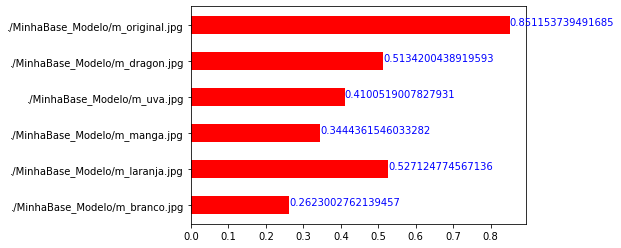

----------  ./MinhaBase_Teste/qualM2.jpg ----------


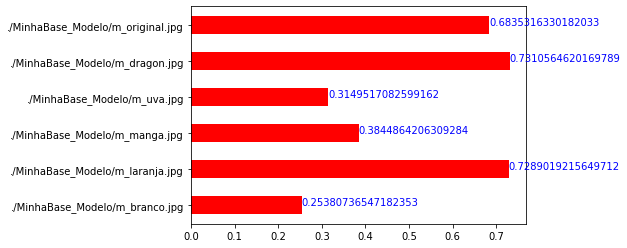

----------  ./MinhaBase_Teste/qualM3.jpg ----------


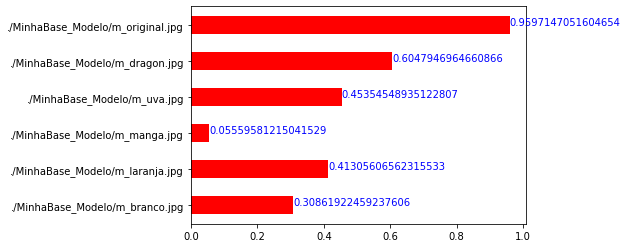

----------  ./MinhaBase_Teste/qualM4.jpg ----------


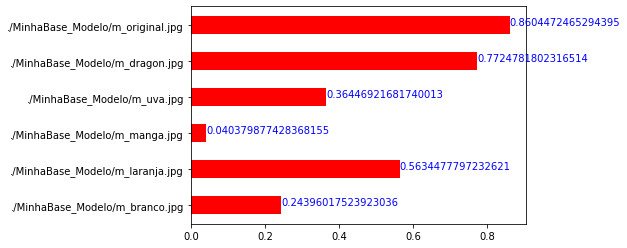

----------  ./MinhaBase_Teste/qualM5.jpg ----------


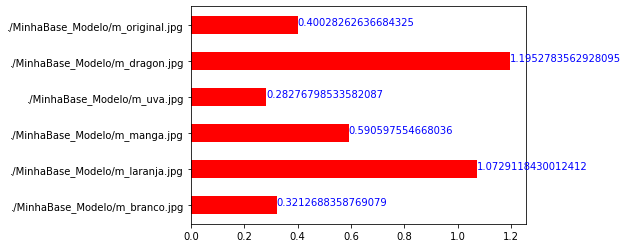

----------  ./MinhaBase_Teste/qualM6.jpg ----------


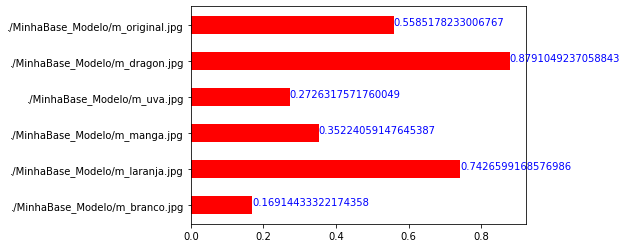

----------  ./MinhaBase_Teste/qualM7.jpg ----------


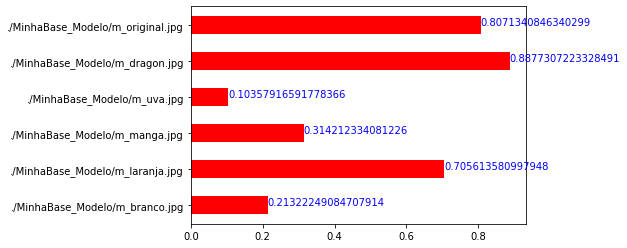

----------  ./MinhaBase_Teste/qualM8.jpg ----------


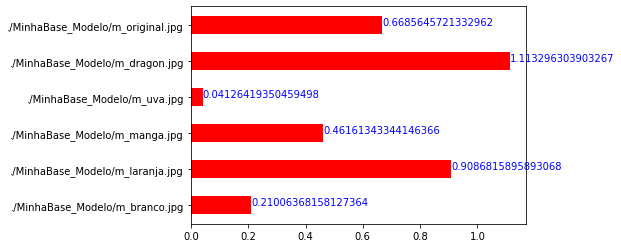

----------  ./MinhaBase_Teste/qualM9.jpg ----------


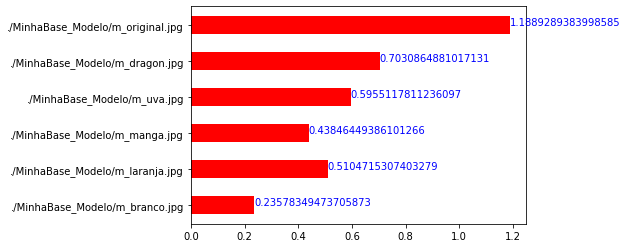

----------  ./MinhaBase_Teste/qualM10.jpg ----------


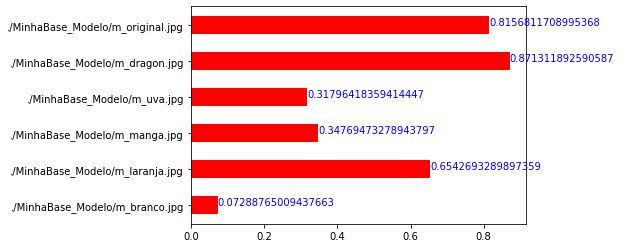

----------  ./MinhaBase_Teste/qualM11.jpg ----------


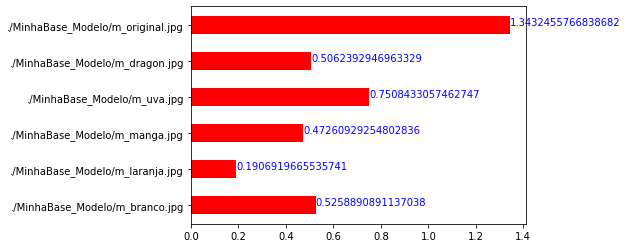

----------  ./MinhaBase_Teste/qualM12.jpg ----------


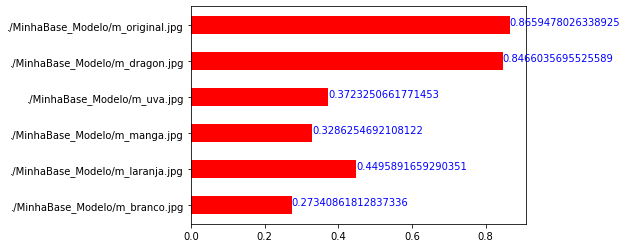

Acertos dos metodos


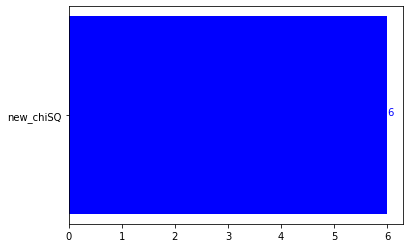

In [45]:
calc_chi2_distance_methods(dic_hist_qualM, dic_hist_modelo, gabarito_qualM)